In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

Refer to: [https://github.com/uci-ml-repo/ucimlrepo](https://github.com/uci-ml-repo/ucimlrepo)

In [71]:
from ucimlrepo import fetch_ucirepo

dataset = fetch_ucirepo(id=296)

/opt/miniconda3/envs/it5006-group10/lib/python3.11/site-packages/ucimlrepo/fetch.py:97: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


In [72]:
data = dataset.data.original.copy()
data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


## Data Context

In [73]:
dataset.metadata.abstract

'The dataset represents ten years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. Each row concerns hospital records of patients diagnosed with diabetes, who underwent laboratory, medications, and stayed up to 14 days. The goal is to determine the early readmission of the patient within 30 days of discharge.\nThe problem is important for the following reasons. Despite high-quality evidence showing improved clinical outcomes for diabetic patients who receive various preventive and therapeutic interventions, many patients do not receive them. This can be partially attributed to arbitrary diabetes management in hospital environments, which fail to attend to glycemic control. Failure to provide proper diabetes care not only increases the managing costs for the hospitals (as the patients are readmitted) but also impacts the morbidity and mortality of the patients, who may face complications associated with diabetes.\n'

In [74]:
dataset.metadata.intro_paper

{'ID': 225,
 'type': 'NATIVE',
 'title': 'Impact of HbA1c Measurement on Hospital Readmission Rates: Analysis of 70,000 Clinical Database Patient Record',
 'authors': 'Beata Strack, Jonathan DeShazo, Chris Gennings, Juan Olmo, Sebastian Ventura, Krzysztof Cios, John Clore',
 'venue': 'BioMed Research International, vol. 2014',
 'year': 2014,
 'journal': None,
 'DOI': None,
 'URL': 'https://www.hindawi.com/journals/bmri/2014/781670/',
 'sha': None,
 'corpus': None,
 'arxiv': None,
 'mag': None,
 'acl': None,
 'pmid': None,
 'pmcid': None}

In [75]:
dataset.metadata.repository_url

'https://archive.ics.uci.edu/dataset/296/diabetes+130-us+hospitals+for+years+1999-2008'

In [76]:
dataset.variables

,name,role,type,demographic,description,units,missing_values
0,encounter_id,ID,,None,Unique identifier of an encounter,None,no
1,patient_nbr,ID,,None,Unique identifier of a patient,None,no
2,race,Feature,Categorical,Race,"Values: Caucasian, Asian, African American, Hi...",None,yes
3,gender,Feature,Categorical,Gender,"Values: male, female, and unknown/invalid",None,no
4,age,Feature,Categorical,Age,"Grouped in 10-year intervals: [0, 10), [10, 20...",None,no
5,weight,Feature,Categorical,None,Weight in pounds.,None,yes
6,admission_type_id,Feature,Categorical,None,Integer identifier corresponding to 9 distinct...,None,no
7,discharge_disposition_id,Feature,Categorical,None,Integer identifier corresponding to 29 distinc...,None,no
8,admission_source_id,Feature,Categorical,None,Integer identifier corresponding to 21 distinc...,None,no
9,time_in_hospital,Feature,Integer,None,Integer number of days between admission and d...,None,no


## Outcome Distribution

In [77]:
data["readmitted"] = data["readmitted"].astype('category')
outcome_value_counts = data["readmitted"].value_counts()
outcome_value_counts

readmitted
NO     54864
>30    35545
<30    11357
Name: count, dtype: int64

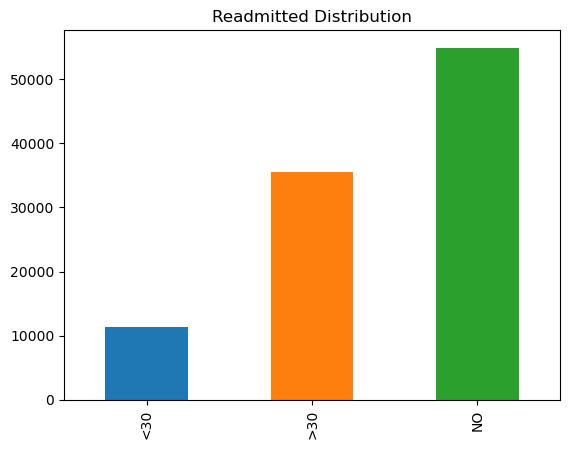

In [78]:
data["readmitted"] = data["readmitted"].cat.reorder_categories(["<30", ">30", "NO"])
data["readmitted"].value_counts().reindex(data["readmitted"].cat.categories).plot(kind="bar", title="Readmitted Distribution", color=['#1f77b4', '#ff7f0e', '#2ca02c']);

##### Observation

The outcome distribution is not too skewed. Even the smallest class `< 30` is sufficiently dense with ~10K data points (~10%).

## Data Completeness

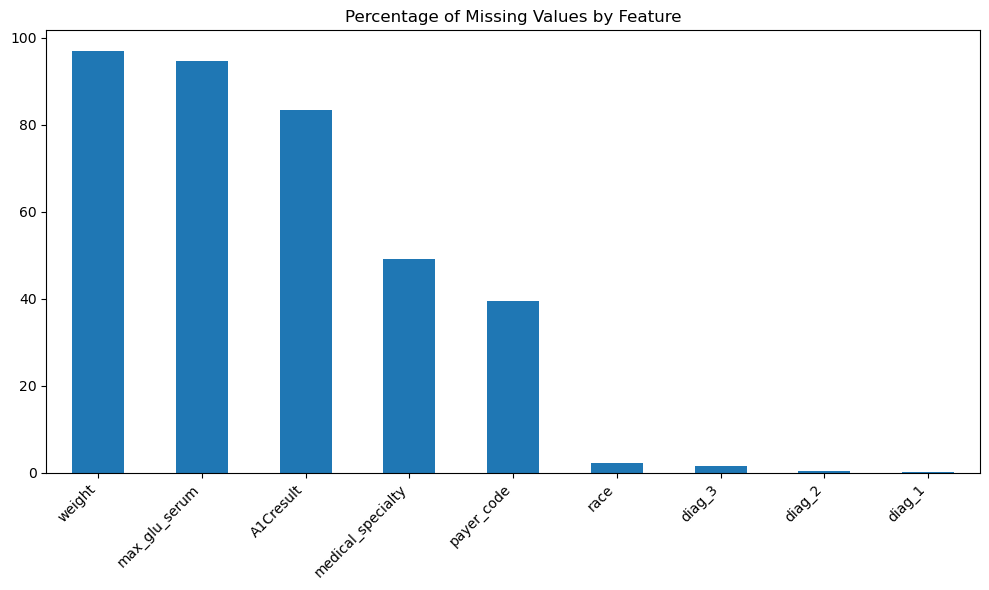

In [79]:
missing_count = data.isnull().sum()
missing_pct = (missing_count / len(data)) * 100
missing_stats = pd.DataFrame({
    'missing_count': missing_count,
    'missing_pct': missing_pct
}).sort_values('missing_pct', ascending=False)

plt.figure(figsize=(10, 6))
missing_stats[missing_stats['missing_pct'] > 0]['missing_pct'].plot(kind='bar')
plt.title('Percentage of Missing Values by Feature')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()


In [80]:
missing_pct[missing_pct > 0].sort_values(ascending=False)

weight               96.858479
max_glu_serum        94.746772
A1Cresult            83.277322
medical_specialty    49.082208
payer_code           39.557416
race                  2.233555
diag_3                1.398306
diag_2                0.351787
diag_1                0.020636
dtype: float64

##### Observation

The percentage of the demographics feature `weight` (97%) is quite high reducing its usefulness in modeling. Lab result features `max_glu_serum` (95%) and `A1Cresult` (83%) also have significant missing values but might still be useful as they were the subject of study in the original paper. Other features with significant missing values are `medical_specialty` (49%) and `payer_code` (40%).

## Readmission Distribution between Patients

In [81]:
targets_oh = pd.get_dummies(dataset.data.targets, dtype=int)

In [82]:
grouped_by_patient = data.groupby("patient_nbr")
targets_oh_grouped_by_patient = targets_oh.groupby(data["patient_nbr"])
by_patient = pd.DataFrame({
    "encounters": grouped_by_patient["encounter_id"].count(),
    "readmitted_<30": targets_oh_grouped_by_patient["readmitted_<30"].mean(),
    "readmitted_>30": targets_oh_grouped_by_patient["readmitted_>30"].mean(),
    "readmitted_NO": targets_oh_grouped_by_patient["readmitted_NO"].mean(),
    "time_in_hospital": grouped_by_patient["time_in_hospital"].mean(),
})

In [83]:
by_patient["encounters"].describe()

count    71518.000000
mean         1.422942
std          1.090740
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         40.000000
Name: encounters, dtype: float64

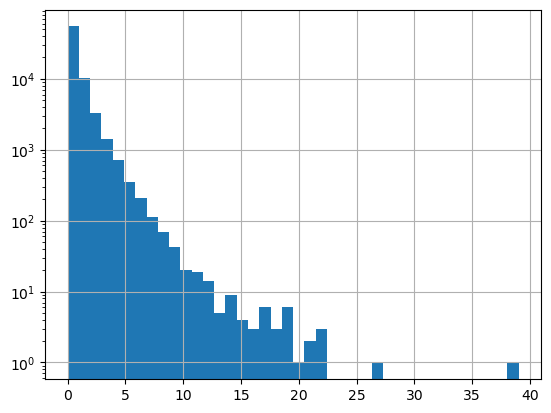

In [84]:
max_patient_encounters = by_patient["encounters"].max()
(by_patient["encounters"] - 1).hist(bins=max_patient_encounters, log=True);

In [85]:
rep_max_patient = by_patient[by_patient["encounters"] == max_patient_encounters].index[0]
data[data["patient_nbr"] == rep_max_patient]

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
38307,119039172,88785891,Caucasian,Female,[20-30),NaN,1,1,7,1,...,No,Up,No,No,No,No,No,Ch,Yes,>30
40252,125094312,88785891,Caucasian,Female,[20-30),NaN,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,<30
40661,126171582,88785891,Caucasian,Female,[20-30),NaN,1,1,7,5,...,No,Up,No,No,No,No,No,Ch,Yes,>30
44515,137245596,88785891,Caucasian,Female,[20-30),NaN,3,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,<30
45147,139425576,88785891,Caucasian,Female,[20-30),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,<30
45986,141994242,88785891,Caucasian,Female,[20-30),NaN,2,1,7,4,...,No,Up,No,No,No,No,No,Ch,Yes,<30
50167,150986298,88785891,Caucasian,Female,[20-30),NaN,2,1,7,1,...,No,Up,No,No,No,No,No,Ch,Yes,<30
50393,151413846,88785891,Caucasian,Female,[20-30),NaN,1,1,7,4,...,No,Up,No,No,No,No,No,Ch,Yes,<30
50773,152188656,88785891,Caucasian,Female,[20-30),NaN,2,7,7,1,...,No,Up,No,No,No,No,No,Ch,Yes,<30
51519,153558456,88785891,Caucasian,Female,[20-30),NaN,2,1,7,1,...,No,Up,No,No,No,No,No,Ch,Yes,<30


##### Observation

Even though data unit in this study is the hospitalization encounter, it is useful also to study from the perspective of the patient. There is significant multiple appearances of the same patient within the dataset with the largest count at 40. The ~100K encounters are distributed between ~70K patients. With the distribution of patient encounters exhibiting a power law relationship. Because certain features like demographic features are repeated within patient encounters while others like number of past visits, prescribed medications are highly correlated, the implication for modelling is:

1. Train/Test split should avoid information leakage via patient (i.e. the same patient should not be in both train and test set)
2. Mixed Model approach might be useful her to separate out the effect of patient level differences from the true individual factors effects.

## Demographics Distributions and Outcome Distributions by Demographics

Obtaining demographics distributions from the data should be done in a way that accounts for patient repetion. For this we weight down each encounter row by the inverse of the patient appearance count

In [86]:
data["race"] = data["race"].astype('category')
data["gender"] = data["gender"].astype('category')
data["age"] = data["age"].astype('category')

In [87]:
demographic_weight = 1 / data["patient_nbr"].map(by_patient["encounters"])

weighted_target_oh = targets_oh.mul(demographic_weight, axis=0)

def get_outcome_by_feature(name, sorted=False, patient_weighted=False):
    # Group by feature and sum the weighted one-hot columns
    outcome_by_feature = weighted_target_oh.groupby(data[name]).sum(
    ) if patient_weighted else data.groupby(name)['readmitted'].value_counts().unstack(fill_value=0)

    if not sorted:
        return outcome_by_feature

    # Sort by total counts if requested
    counts = data[name].value_counts().sort_values(ascending=False)
    return outcome_by_feature.reindex(counts.index)

### Race

/var/folders/f4/31_68v2j2cv6d4n29813zycw0000gn/T/ipykernel_38247/2048430354.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  outcome_by_feature = weighted_target_oh.groupby(data[name]).sum(


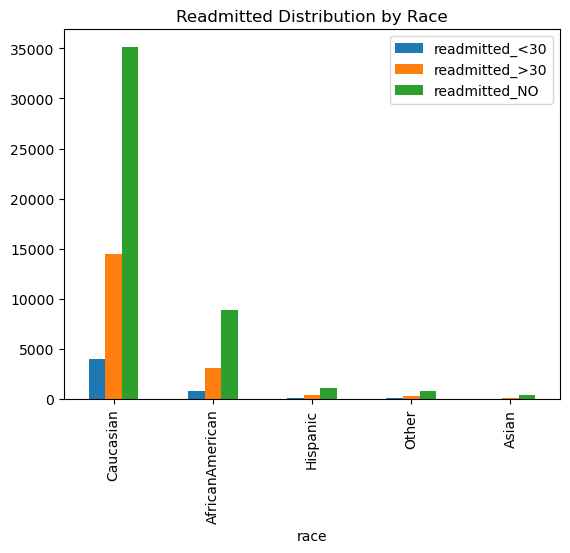

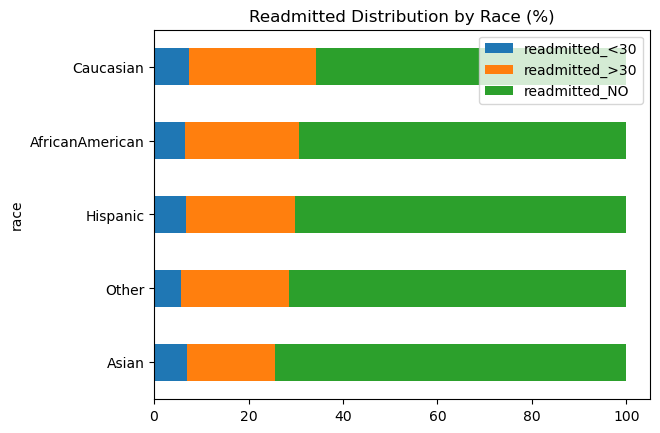

In [88]:
outcome_by_race = get_outcome_by_feature("race", sorted=True, patient_weighted=True)
outcome_by_race.plot(kind="bar", title="Readmitted Distribution by Race");
outcome_by_race_pct = outcome_by_race.div(outcome_by_race.sum(axis=1), axis=0) * 100
outcome_by_race_pct.iloc[::-1].plot(kind="barh", stacked=True, title="Readmitted Distribution by Race (%)");

##### Observation

Visualizing the outcome distribution  (in %) for different race group, we can see race as a factor likely contributed to difference in outcome. Caucasian (which is the largest group) are more likely to be readmitted than other races. The exact significance of this factor will have to be determined by statisticaly test (like Chi Square).

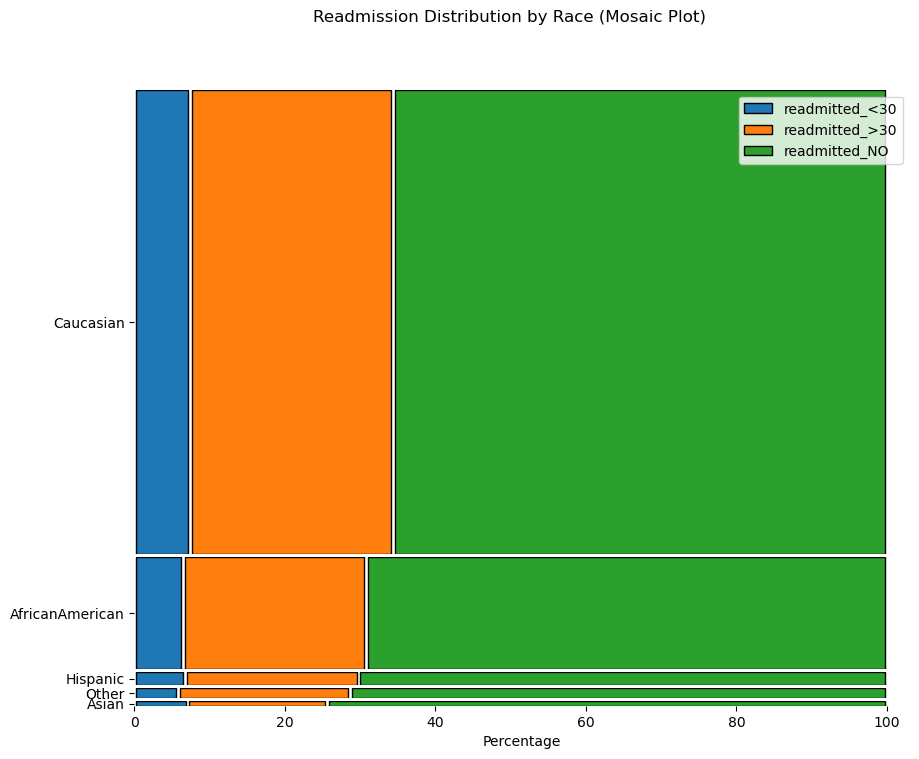

In [99]:
from matplotlib import gridspec

# Get raw counts for race distribution
race_counts = outcome_by_race.sum(axis=1)
race_proportions = race_counts / race_counts.sum()

# Create figure with custom height ratios based on race proportions
fig = plt.figure(figsize=(10, 8))
gs = gridspec.GridSpec(len(race_counts), 3, height_ratios=race_proportions, hspace=0.025)

# Plot each race as a row
for i, (race, proportion) in enumerate(race_proportions.items()):
    ax = plt.subplot(gs[i, :])
    
    # Get readmission proportions for this race
    race_data = outcome_by_race_pct.loc[race]
    
    # Plot stacked bars with gaps between categories
    left = 0
    gap_size = 0.5  # Gap between segments as percentage
    for j, (col, val) in enumerate(race_data.items()):
        ax.barh(0, val - gap_size, left=left + gap_size / 2, height=1, label=col.replace('weighted_readmitted_', ''), 
                edgecolor='black', linewidth=1)
        left += val
    
    # Customize appearance
    ax.set_yticks([0])
    ax.set_yticklabels([race])
    if i < len(race_counts)-1:
        ax.set_xticks([])
    else:
        ax.set_xlabel('Percentage')
    ax.set_xlim(0, 100 + (len(race_data) - 1) * (gap_size + 1))
    ax.set_ylim(-0.5, 0.5)
    # Remove grid lines and subplot borders
    ax.grid(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

plt.suptitle('Readmission Distribution by Race (Mosaic Plot)')
# Set legend on the first subplot to position it relative to the top
first_ax = plt.subplot(gs[0, :])
first_ax.legend(bbox_to_anchor=(1, 1), loc='upper right')

/var/folders/f4/31_68v2j2cv6d4n29813zycw0000gn/T/ipykernel_38247/3237431850.py:85: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


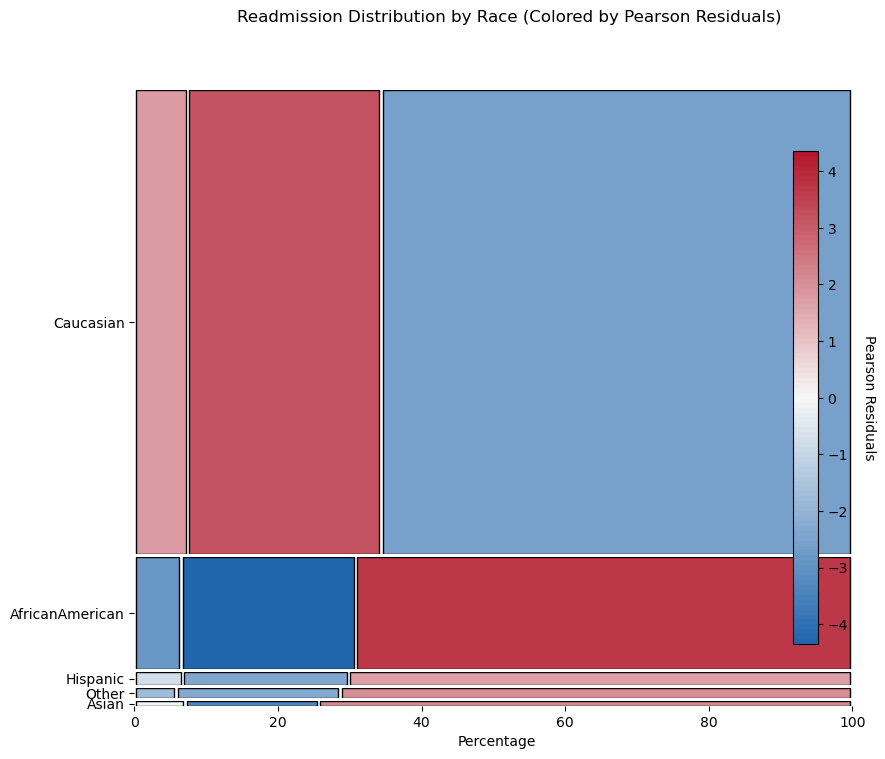

In [90]:
# Mosaic plot colored by Pearson residuals
from matplotlib import gridspec
from scipy.stats import chi2_contingency

# Calculate Pearson residuals for race vs readmission
contingency_table = pd.crosstab(
    data['race'], 
    data['readmitted'],
    values=demographic_weight,
    aggfunc='sum'
)

# Calculate expected frequencies
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Calculate Pearson residuals
pearson_residuals = (contingency_table - expected) / np.sqrt(expected)

# Get raw counts for race distribution
race_counts = outcome_by_race.sum(axis=1)
race_proportions = race_counts / race_counts.sum()

# Create figure with custom height ratios based on race proportions
fig = plt.figure(figsize=(10, 8))
gs = gridspec.GridSpec(len(race_counts), 3, height_ratios=race_proportions, hspace=0.025)

# Create colormap for residuals (red for positive, blue for negative)
from matplotlib.colors import LinearSegmentedColormap
colors = ['#2166ac', '#f7f7f7', '#b2182b']  # Blue to white to red
n_bins = 100
cmap = LinearSegmentedColormap.from_list('residual', colors, N=n_bins)

# Get min and max residuals for normalization
residual_min = pearson_residuals.min().min()
residual_max = pearson_residuals.max().max()
max_abs_residual = max(abs(residual_min), abs(residual_max))

# Plot each race as a row
for i, (race, proportion) in enumerate(race_proportions.items()):
    ax = plt.subplot(gs[i, :])
    
    # Get readmission proportions for this race
    race_data = outcome_by_race_pct.loc[race]
    
    # Plot stacked bars with gaps between categories, colored by residuals
    left = 0
    gap_size = 0.5  # Gap between segments as percentage
    for j, (col, val) in enumerate(race_data.items()):
        # Get the residual for this race-readmission combination
        readmission_cat = col.replace('readmitted_', '')
        residual = pearson_residuals.loc[race, readmission_cat]
        
        # Normalize residual to 0-1 range for colormap
        normalized_residual = (residual + max_abs_residual) / (2 * max_abs_residual)
        color = cmap(normalized_residual)
        
        ax.barh(0, val - gap_size, left=left + gap_size / 2, height=1, color=color, 
                edgecolor='black', linewidth=1)
        left += val
    
    # Customize appearance
    ax.set_yticks([0])
    ax.set_yticklabels([race])
    if i < len(race_counts)-1:
        ax.set_xticks([])
    else:
        ax.set_xlabel('Percentage')
    ax.set_xlim(0, 100 + (len(race_data) - 1) * gap_size)
    ax.set_ylim(-0.5, 0.5)
    # Remove grid lines and subplot borders
    ax.grid(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

plt.suptitle('Readmission Distribution by Race (Colored by Pearson Residuals)')

# Add colorbar positioned relative to the figure
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=-max_abs_residual, vmax=max_abs_residual))
sm.set_array([])
cbar = fig.colorbar(sm, ax=fig.get_axes(), shrink=0.8, pad=0.02)
cbar.set_label('Pearson Residuals', rotation=270, labelpad=20)

plt.tight_layout()
plt.subplots_adjust(right=0.85)
plt.show()

### Gender

/var/folders/f4/31_68v2j2cv6d4n29813zycw0000gn/T/ipykernel_38247/2048430354.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  outcome_by_feature = weighted_target_oh.groupby(data[name]).sum(


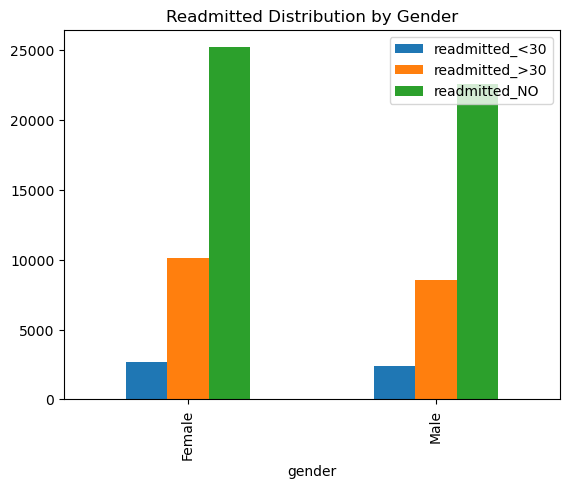

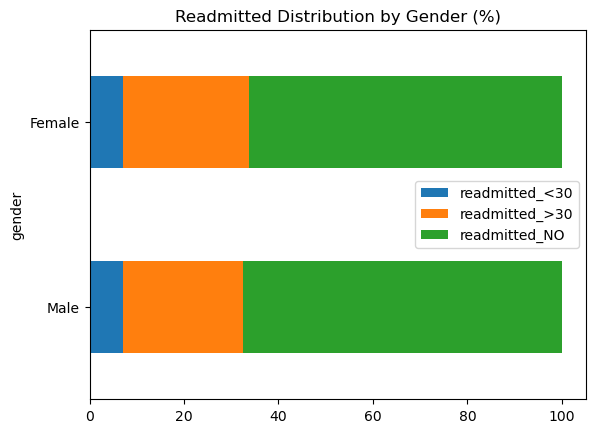

In [91]:
outcome_by_gender = get_outcome_by_feature("gender", sorted=True, patient_weighted=True).drop("Unknown/Invalid", errors="ignore")
outcome_by_gender.plot(kind="bar", title="Readmitted Distribution by Gender");
outcome_by_gender_pct = outcome_by_gender.div(outcome_by_gender.sum(axis=1), axis=0) * 100
outcome_by_gender_pct.iloc[::-1].plot(kind="barh", stacked=True, title="Readmitted Distribution by Gender (%)");

##### Observation

Gender does not show as strong an effect on outcome as compared to race.

### Age

In [92]:
print(data["age"].cat.categories)
data["age"] = data["age"].cat.reorder_categories(['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)', '[60-70)', '[70-80)', '[80-90)', '[90-100)'])

Index(['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)',
       '[60-70)', '[70-80)', '[80-90)', '[90-100)'],
      dtype='object')


/var/folders/f4/31_68v2j2cv6d4n29813zycw0000gn/T/ipykernel_38247/2048430354.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  outcome_by_feature = weighted_target_oh.groupby(data[name]).sum(


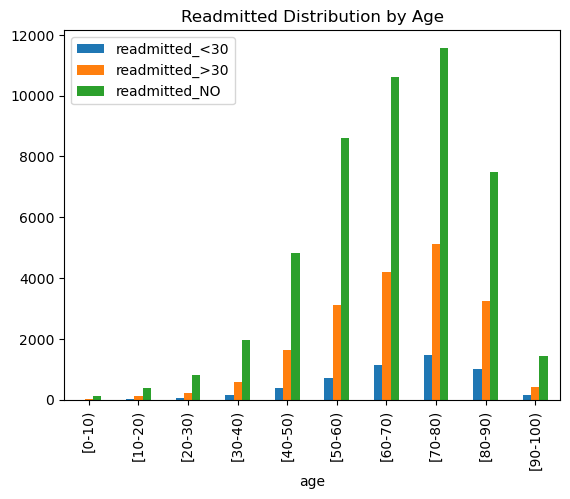

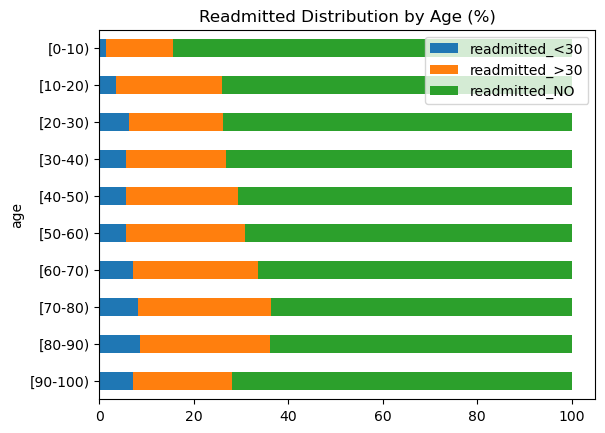

In [93]:
outcome_by_age = get_outcome_by_feature("age", patient_weighted=True)
outcome_by_age.plot(kind="bar", title="Readmitted Distribution by Age");
outcome_by_age_pct = outcome_by_age.div(outcome_by_age.sum(axis=1), axis=0) * 100
outcome_by_age_pct.iloc[::-1].plot(kind="barh", stacked=True, title="Readmitted Distribution by Age (%)");

##### Observation

The effect of age on outcome appear significant. The crude relation seem to be that older patients are more likely to be readmitted than younger ones.

### Chi-squared Test

The Chi Square Test is used to determined if the effect of various demographic factors on outcome is statistically significant.

In [94]:
from scipy.stats import chi2_contingency

def perform_chi_square_test(feature):
    """
    Perform chi-square test of independence 
    between demographic feature and readmission status,
    adjusted with demographic_weight
    """
    # Create contingency table weighted by demographic weights
    contingency_table = pd.crosstab(
        data[feature][data[feature] != "Unknown"], 
        data['readmitted'],
        values=demographic_weight,
        aggfunc='sum'
    )
    
    # Perform chi-square test
    chi2, p_value, dof, _ = chi2_contingency(contingency_table)
    
    print(f"Chi-square test for {feature} vs readmission status:")
    print(f"Chi-square statistic: {chi2:.4f}")
    print(f"p-value: {p_value:.4f}")
    print(f"Degrees of freedom: {dof}")
    print("Contingency table:")
    print(contingency_table.round().astype(int))
    print()
    
    return chi2, p_value, contingency_table

In [95]:
for feature in ["race", "gender", "age"]:
    perform_chi_square_test(feature)

Chi-square test for race vs readmission status:
Chi-square statistic: 98.2473
p-value: 0.0000
Degrees of freedom: 8
Contingency table:
readmitted        <30    >30     NO
race                               
AfricanAmerican   837   3135   8931
Asian              35     94    375
Caucasian        3942  14434  35141
Hispanic          101    350   1062
Other              67    268    836

Chi-square test for gender vs readmission status:
Chi-square statistic: 15.6053
p-value: 0.0036
Degrees of freedom: 4
Contingency table:
readmitted        <30    >30     NO
gender                             
Female           2712  10124  25188
Male             2374   8513  22603
Unknown/Invalid     0      0      3

Chi-square test for age vs readmission status:
Chi-square statistic: 389.0630
p-value: 0.0000
Degrees of freedom: 18
Contingency table:
readmitted   <30   >30     NO
age                          
[0-10)         2    22    130
[10-20)       19   119    392
[20-30)       69   224    824
[30-40) 

##### Observation

All three demographic factors individually show statistical significance in its effect on outcome. Even `gender` that is the least statistically significant factor among the three has rather low p-value at 0.0036.

### Interaction Plot

Interaction plots are used to test if simple additive effects are sufficient to capture data variation or there could be more complex interaction between different factors.

/var/folders/f4/31_68v2j2cv6d4n29813zycw0000gn/T/ipykernel_38247/2369070257.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  race_totals = demographic_weight.groupby(data['race']).sum()


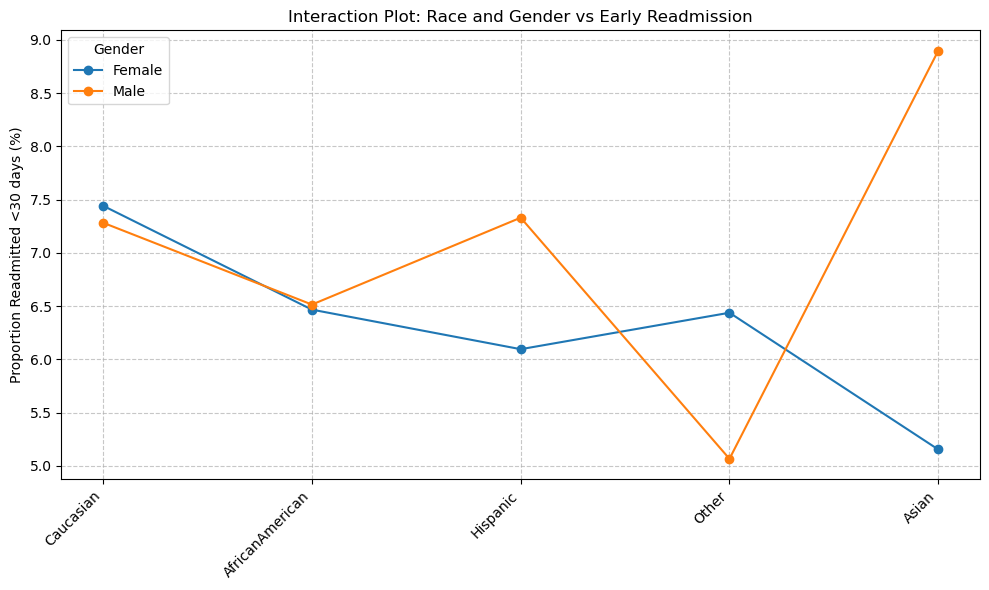

In [ ]:
# Create a figure
plt.figure(figsize=(10, 6))

# Calculate proportion of readmission <30 days for each race-gender combination
prop_readmitted = pd.crosstab(
    [data['race'], data['gender']], 
    data['readmitted'] == '<30',
    values=demographic_weight,
    aggfunc='sum',
    normalize='index'
)[True]

# Reshape data for plotting and filter out Unknown/Invalid gender
prop_readmitted = prop_readmitted.unstack()
prop_readmitted = prop_readmitted.drop('Unknown/Invalid', axis=1)
prop_readmitted = prop_readmitted * 100

# Sort races by total prevalence (descending)
race_totals = demographic_weight.groupby(data['race']).sum()
race_order = race_totals.sort_values(ascending=False).index
prop_readmitted = prop_readmitted.reindex(race_order)

# Create interaction plot
for gender in prop_readmitted.columns:
    plt.plot(
        range(len(prop_readmitted.index)),
        prop_readmitted[gender],
        'o-',
        label=gender
    )

plt.xticks(
    range(len(prop_readmitted.index)),
    prop_readmitted.index,
    rotation=45,
    ha='right'
)
plt.ylabel('Proportion Readmitted <30 days (%)')
plt.title('Interaction Plot: Race and Gender vs Early Readmission')
plt.legend(title='Gender')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout();

##### Observation

The interaction plot between `race` and `gender` shows additive contribution is not sufficient for outcome prediction. Readmission risk is significantly higher for males in the Hispanic and Asian groups than observed in the population mean. Though we need to be careful here to avoid avoid drawing premature conclusion as the proportion of these race groups are small these more susceptable to sampling bias.

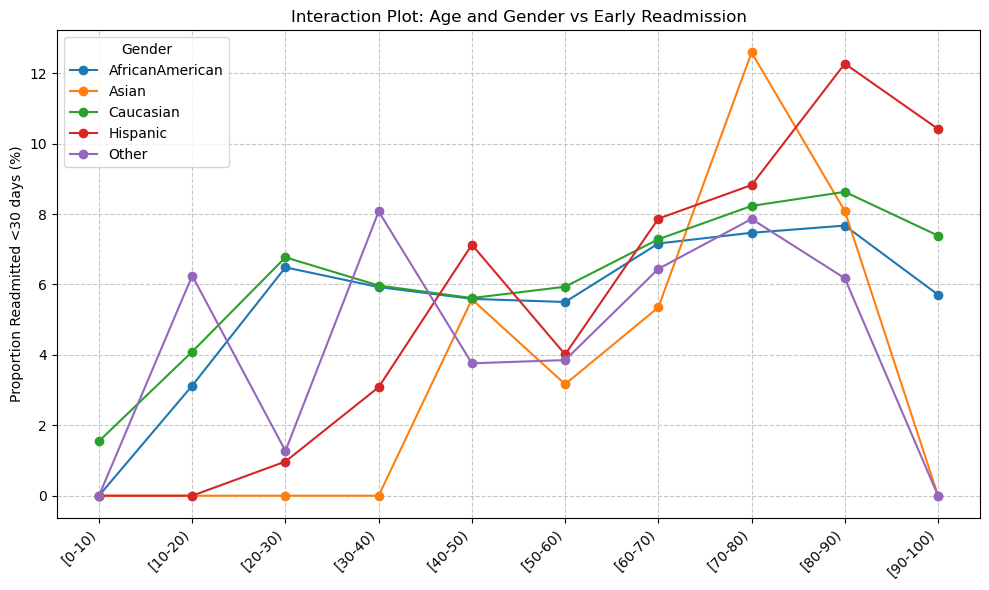

In [25]:
plt.figure(figsize=(10, 6))

# Calculate proportion of readmission <30 days for each age-gender combination
prop_readmitted = pd.crosstab(
    [data['age'], data['race']], 
    data['readmitted'] == '<30',
    values=demographic_weight,
    aggfunc='sum',
    normalize='index'
)[True]

# Reshape data for plotting and filter out Unknown/Invalid gender
prop_readmitted = prop_readmitted.unstack()
# prop_readmitted = prop_readmitted.drop('Unknown/Invalid', axis=1)
prop_readmitted = prop_readmitted * 100

# Create interaction plot
for gender in prop_readmitted.columns:
    plt.plot(
        range(len(prop_readmitted.index)),
        prop_readmitted[gender],
        'o-',
        label=gender
    )

# Customize plot
plt.xticks(
    range(len(prop_readmitted.index)),
    prop_readmitted.index,
    rotation=45,
    ha='right'
)
plt.ylabel('Proportion Readmitted <30 days (%)')
plt.title('Interaction Plot: Age and Gender vs Early Readmission')
plt.legend(title='Gender')
plt.grid(True, linestyle='--', alpha=0.7)

# Adjust layout to prevent label cutoff
plt.tight_layout()


##### Observation

The combination of `age` and `race` factors also show likely non-additive effects even after considering sampling bianess in the smaller race groups as we can see the effect curves of the two largest race group (Caucasians & African Americans) are mostly not parallel. 

## Outcome Distribution By Admission Type, Admission Source & Discharge Disposition

In [27]:
data["admission_type_id"] = data["admission_type_id"].astype('category')
data["admission_source_id"] = data["admission_source_id"].astype('category')
data["discharge_disposition_id"] = data["discharge_disposition_id"].astype('category')

In [28]:
import json

with open('../data/metadata.json', 'r') as f:
    metadata = json.load(f)
    
admission_type_labels = {item['cat']: item['label'] for item in metadata['admission_type_labels']}
admission_source_labels = {item['cat']: item['label'] for item in metadata['admission_source_labels']}
discharge_disposition_labels = {item['cat']: item['label'] for item in metadata['discharge_disposition_labels']}


Source:
- https://archive.ics.uci.edu/static/public/296/diabetes+130-us+hospitals+for+years+1999-2008.zip

/var/folders/f4/31_68v2j2cv6d4n29813zycw0000gn/T/ipykernel_38247/2048430354.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ) if patient_weighted else data.groupby(name)['readmitted'].value_counts().unstack(fill_value=0)


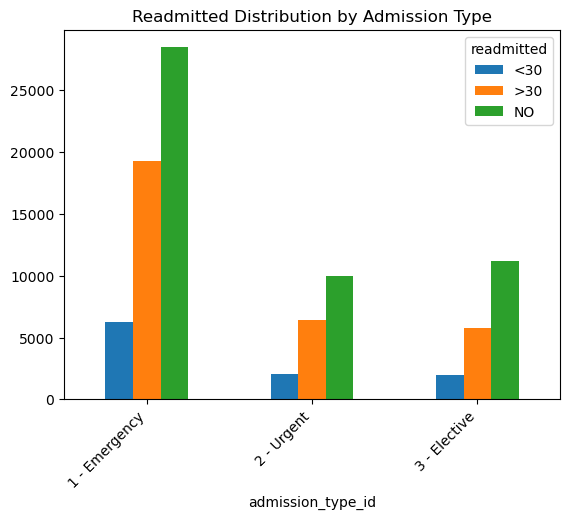

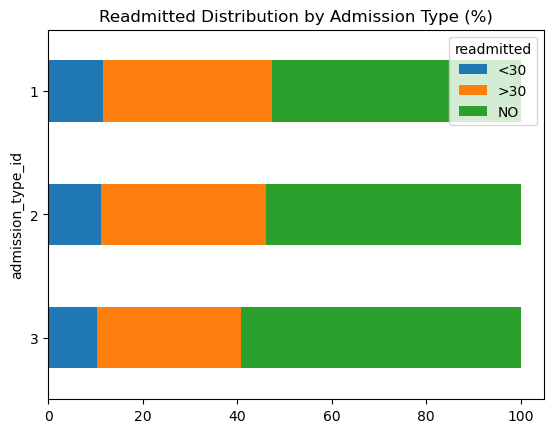

In [29]:
outcome_by_admission_type = get_outcome_by_feature("admission_type_id")
groups_to_keep = outcome_by_admission_type.index.isin([1, 2, 3])
outcome_by_admission_type_subset = outcome_by_admission_type[groups_to_keep]
# Create labels with code and description
labels = [f"{code} - {admission_type_labels[code]}" for code in outcome_by_admission_type_subset.index]
outcome_by_admission_type_subset.plot(kind="bar", title="Readmitted Distribution by Admission Type")
plt.xticks(range(len(labels)), labels, rotation=45, ha='right');
outcome_by_admission_type_pct = outcome_by_admission_type_subset.div(outcome_by_admission_type_subset.sum(axis=1), axis=0) * 100
outcome_by_admission_type_pct.iloc[::-1].plot(kind="barh", stacked=True, title="Readmitted Distribution by Admission Type (%)");

/var/folders/f4/31_68v2j2cv6d4n29813zycw0000gn/T/ipykernel_38247/2048430354.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ) if patient_weighted else data.groupby(name)['readmitted'].value_counts().unstack(fill_value=0)


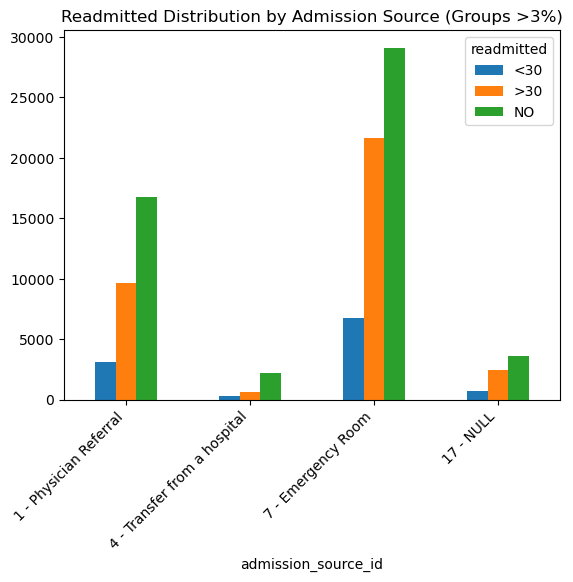

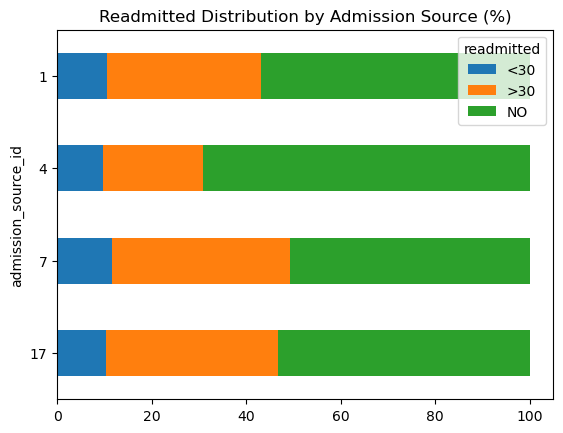

In [30]:
outcome_by_admission_source = get_outcome_by_feature("admission_source_id")
groups_to_keep = outcome_by_admission_source.sum(axis=1) / len(data) >= 0.03
outcome_by_admission_source_subset = outcome_by_admission_source[groups_to_keep]
# Create labels with code and description
labels = [f"{code} - {admission_source_labels[code]}" for code in outcome_by_admission_source_subset.index]
outcome_by_admission_source_subset.plot(kind="bar", title="Readmitted Distribution by Admission Source (Groups >3%)")
plt.xticks(range(len(labels)), labels, rotation=45, ha='right');
outcome_by_admission_source_pct = outcome_by_admission_source_subset.div(outcome_by_admission_source_subset.sum(axis=1), axis=0) * 100
outcome_by_admission_source_pct.iloc[::-1].plot(kind="barh", stacked=True, title="Readmitted Distribution by Admission Source (%)");

/var/folders/f4/31_68v2j2cv6d4n29813zycw0000gn/T/ipykernel_38247/2048430354.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ) if patient_weighted else data.groupby(name)['readmitted'].value_counts().unstack(fill_value=0)


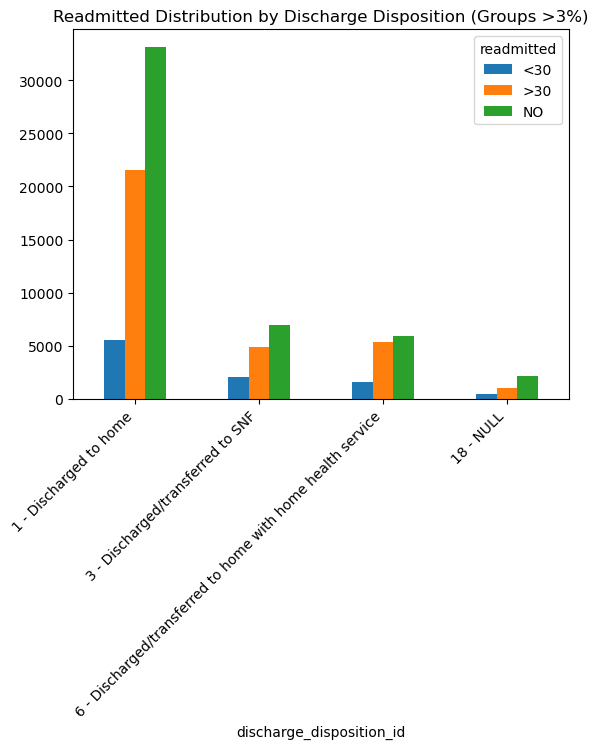

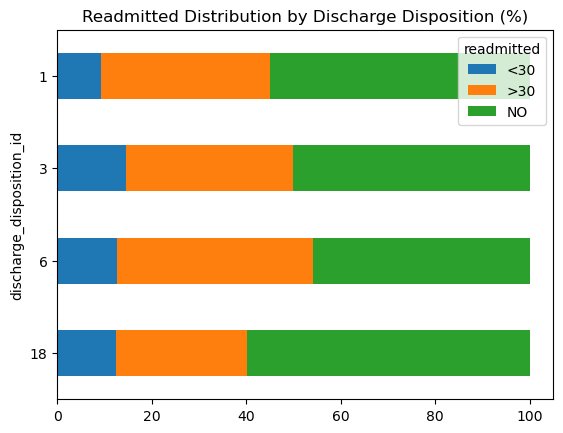

In [31]:
outcome_by_discharge_disposition = get_outcome_by_feature("discharge_disposition_id")
groups_to_keep = outcome_by_discharge_disposition.sum(axis=1) / len(data) >= 0.03
outcome_by_discharge_disposition_subset = outcome_by_discharge_disposition[groups_to_keep]
# Create labels with code and description
labels = [f"{code} - {discharge_disposition_labels[code]}" for code in outcome_by_discharge_disposition_subset.index]
outcome_by_discharge_disposition_subset.plot(kind="bar", title="Readmitted Distribution by Discharge Disposition (Groups >3%)")
plt.xticks(range(len(labels)), labels, rotation=45, ha='right');
outcome_by_discharge_disposition_pct = outcome_by_discharge_disposition_subset.div(outcome_by_discharge_disposition_subset.sum(axis=1), axis=0) * 100
outcome_by_discharge_disposition_pct.iloc[::-1].plot(kind="barh", stacked=True, title="Readmitted Distribution by Discharge Disposition (%)");

##### Observation

Admission Type, Admission Source & Discharge Disposition likely all contributed to difference in readmission outcome.
- For Admission Type going from elective to urgent to emergency increases the likihood of readmission.
- For Admission Source going from hospital transfers to physician referrals to emergency room admission increases readmission likelihood.
- For Discharge Disposition going from discharged to home to discharge to home with health service to discharged to skilled nursing facilities increases readmission likelihood within 30 days.

## Distribution of Length of Stay, Effects of Number of Past Visits & Effects of Number of Procedures Administered and Medications Prescribed

### Length of Stay

In [32]:
data.groupby('readmitted')['time_in_hospital'].mean()

/var/folders/f4/31_68v2j2cv6d4n29813zycw0000gn/T/ipykernel_38247/3768296917.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby('readmitted')['time_in_hospital'].mean()


readmitted
<30    4.768249
>30    4.495541
NO     4.254429
Name: time_in_hospital, dtype: float64

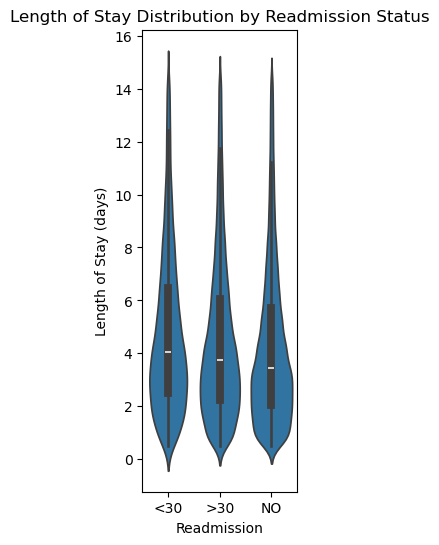

In [33]:
plt.figure(figsize=(2, 6))
jitter = np.random.uniform(-0.5, 0.5, len(data))
sns.violinplot(data=data, x='readmitted', y=data['time_in_hospital'] + jitter)
plt.title('Length of Stay Distribution by Readmission Status')
plt.xlabel('Readmission')
plt.ylabel('Length of Stay (days)')
plt.show()

##### Observation

The mean length of stay is different across different readmission risk groups indicating length of stay could be used as a predictor for readmission risk.

### Number of Past Visits

Text(0, 0.5, 'Number of Inpatient + Emergency Visits')

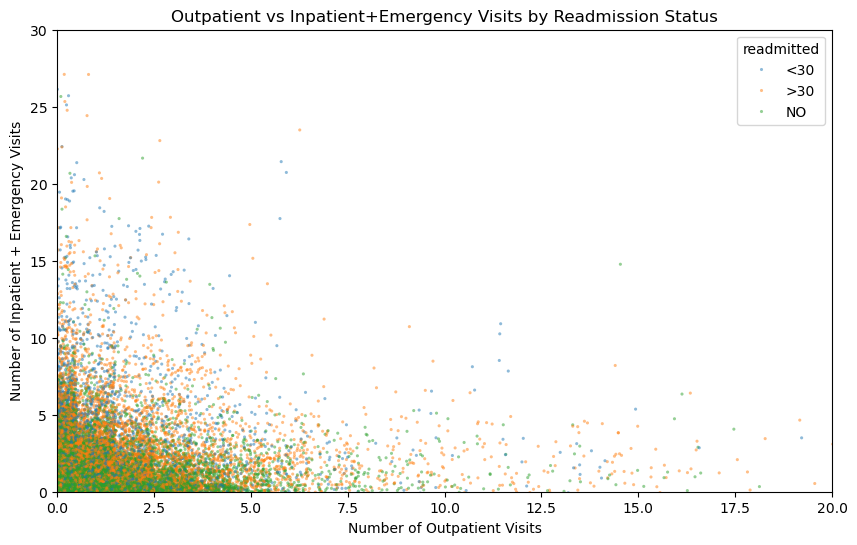

In [103]:
plt.figure(figsize=(10, 6))
# Add random jitter to integer coordinates to reduce overlap
x_jitter = np.random.uniform(-0.5, 0.5, len(data))
y_jitter = np.random.uniform(-0.5, 0.5, len(data))
sns.scatterplot(data=data, 
                x=data['number_outpatient'] + x_jitter,
                y=data['number_inpatient'] + data['number_emergency'] + y_jitter,
                hue='readmitted',
                alpha=0.5,
                linewidth=0,
                s=5)
plt.title('Outpatient vs Inpatient+Emergency Visits by Readmission Status')
plt.xlim(0, 20)
plt.ylim(0, 30)
plt.xlabel('Number of Outpatient Visits')
plt.ylabel('Number of Inpatient + Emergency Visits')

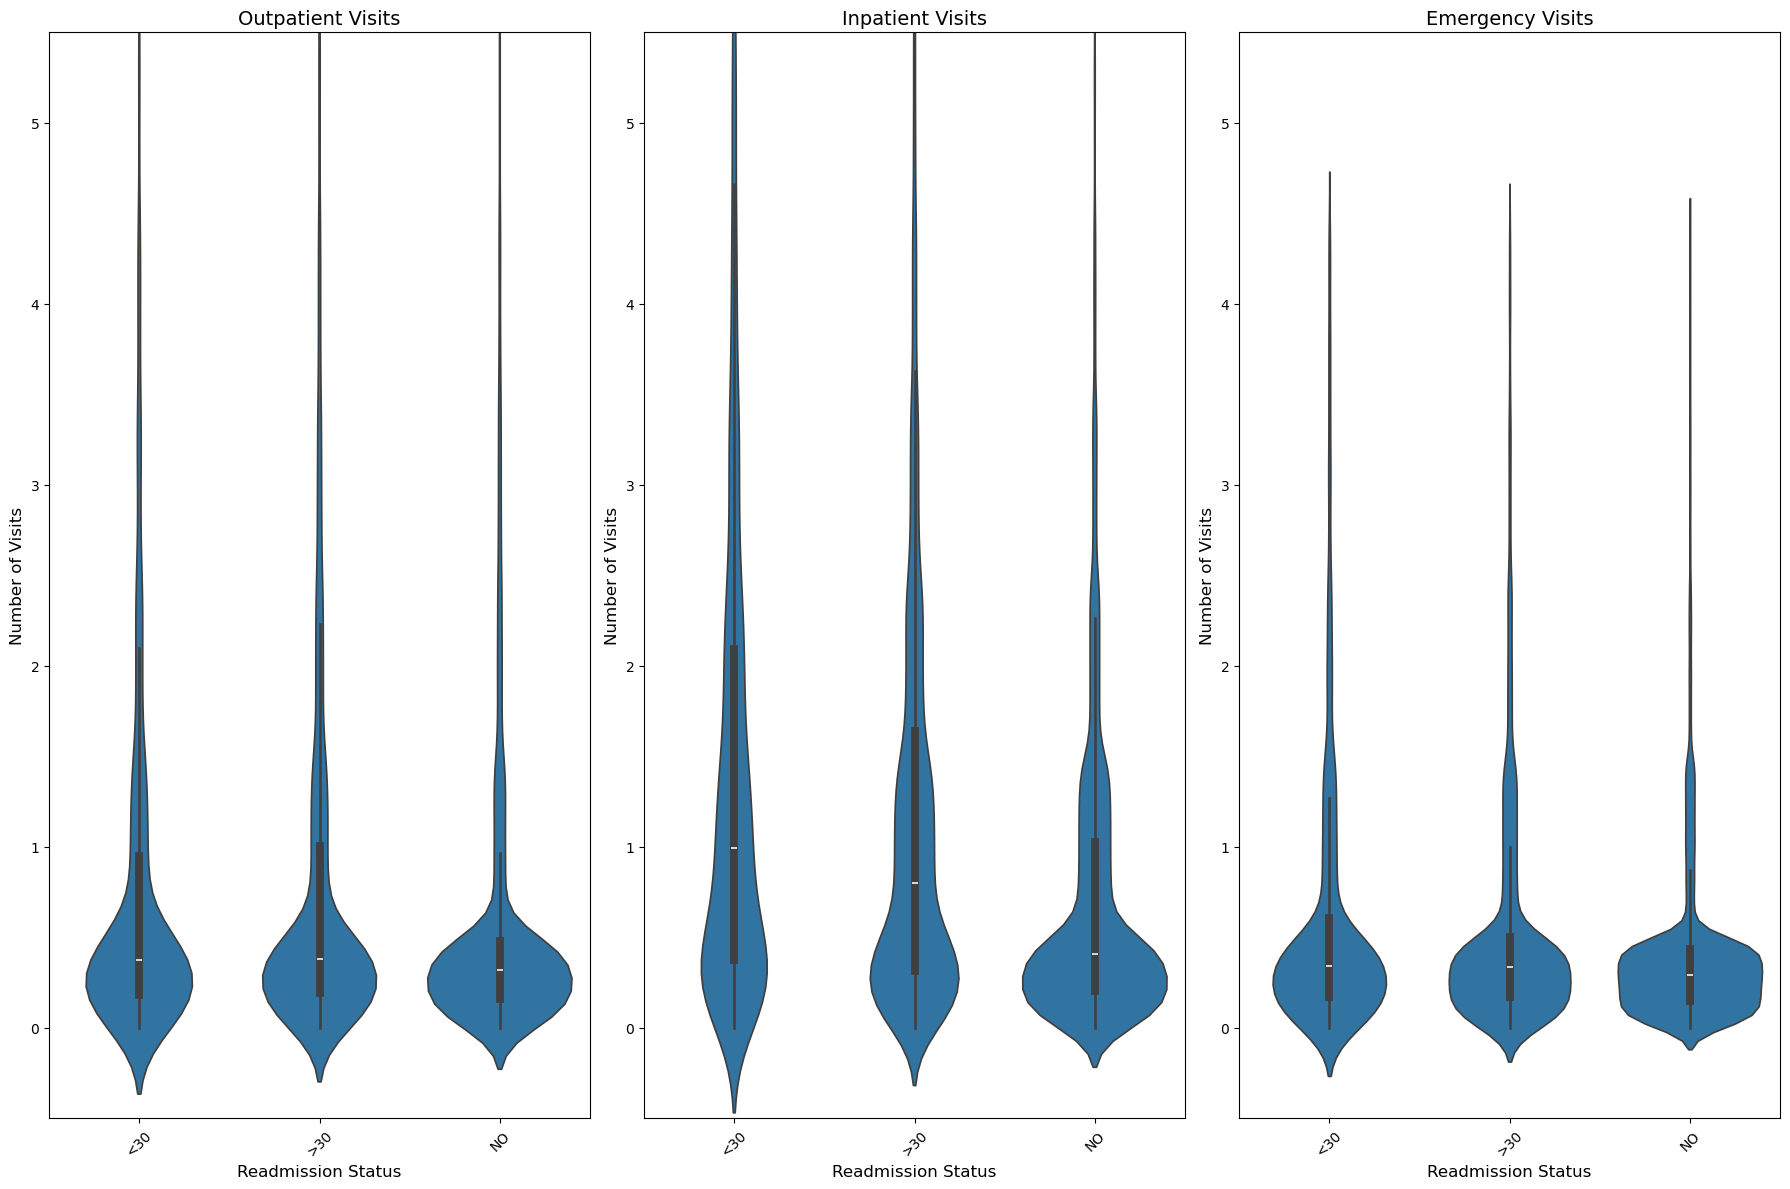

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 12))

visit_types = ['number_outpatient', 'number_inpatient', 'number_emergency']
titles = ['Outpatient Visits', 'Inpatient Visits', 'Emergency Visits']

# First melt the data
melted_data = data.melt(
    id_vars=['readmitted'],
    value_vars=visit_types,
    var_name='visit_type',
    value_name='number_of_visits'
)
# Add random jitter to reduce overlap
melted_data['number_of_visits'] = melted_data['number_of_visits'] + np.random.uniform(-0.5, 0.5, len(melted_data))

# Filter out zeros and top 1% in each visit type group
filtered_melted = melted_data[melted_data['number_of_visits'] > 0]
percentile_99 = filtered_melted.groupby('visit_type')['number_of_visits'].transform(lambda x: x.quantile(0.99))
filtered_melted = filtered_melted[filtered_melted['number_of_visits'] <= percentile_99]

for i, (visit_type, title) in enumerate(zip(visit_types, titles)):
    subset = filtered_melted[filtered_melted['visit_type'] == visit_type]
    
    sns.violinplot(data=subset, 
                   x='readmitted', 
                   y='number_of_visits',
                   ax=axes[i],
                   inner='box')
    axes[i].set_ylim(-0.5, 5.5)
    axes[i].set_title(title, fontsize=14)
    axes[i].set_xlabel('Readmission Status', fontsize=12)
    axes[i].set_ylabel('Number of Visits', fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

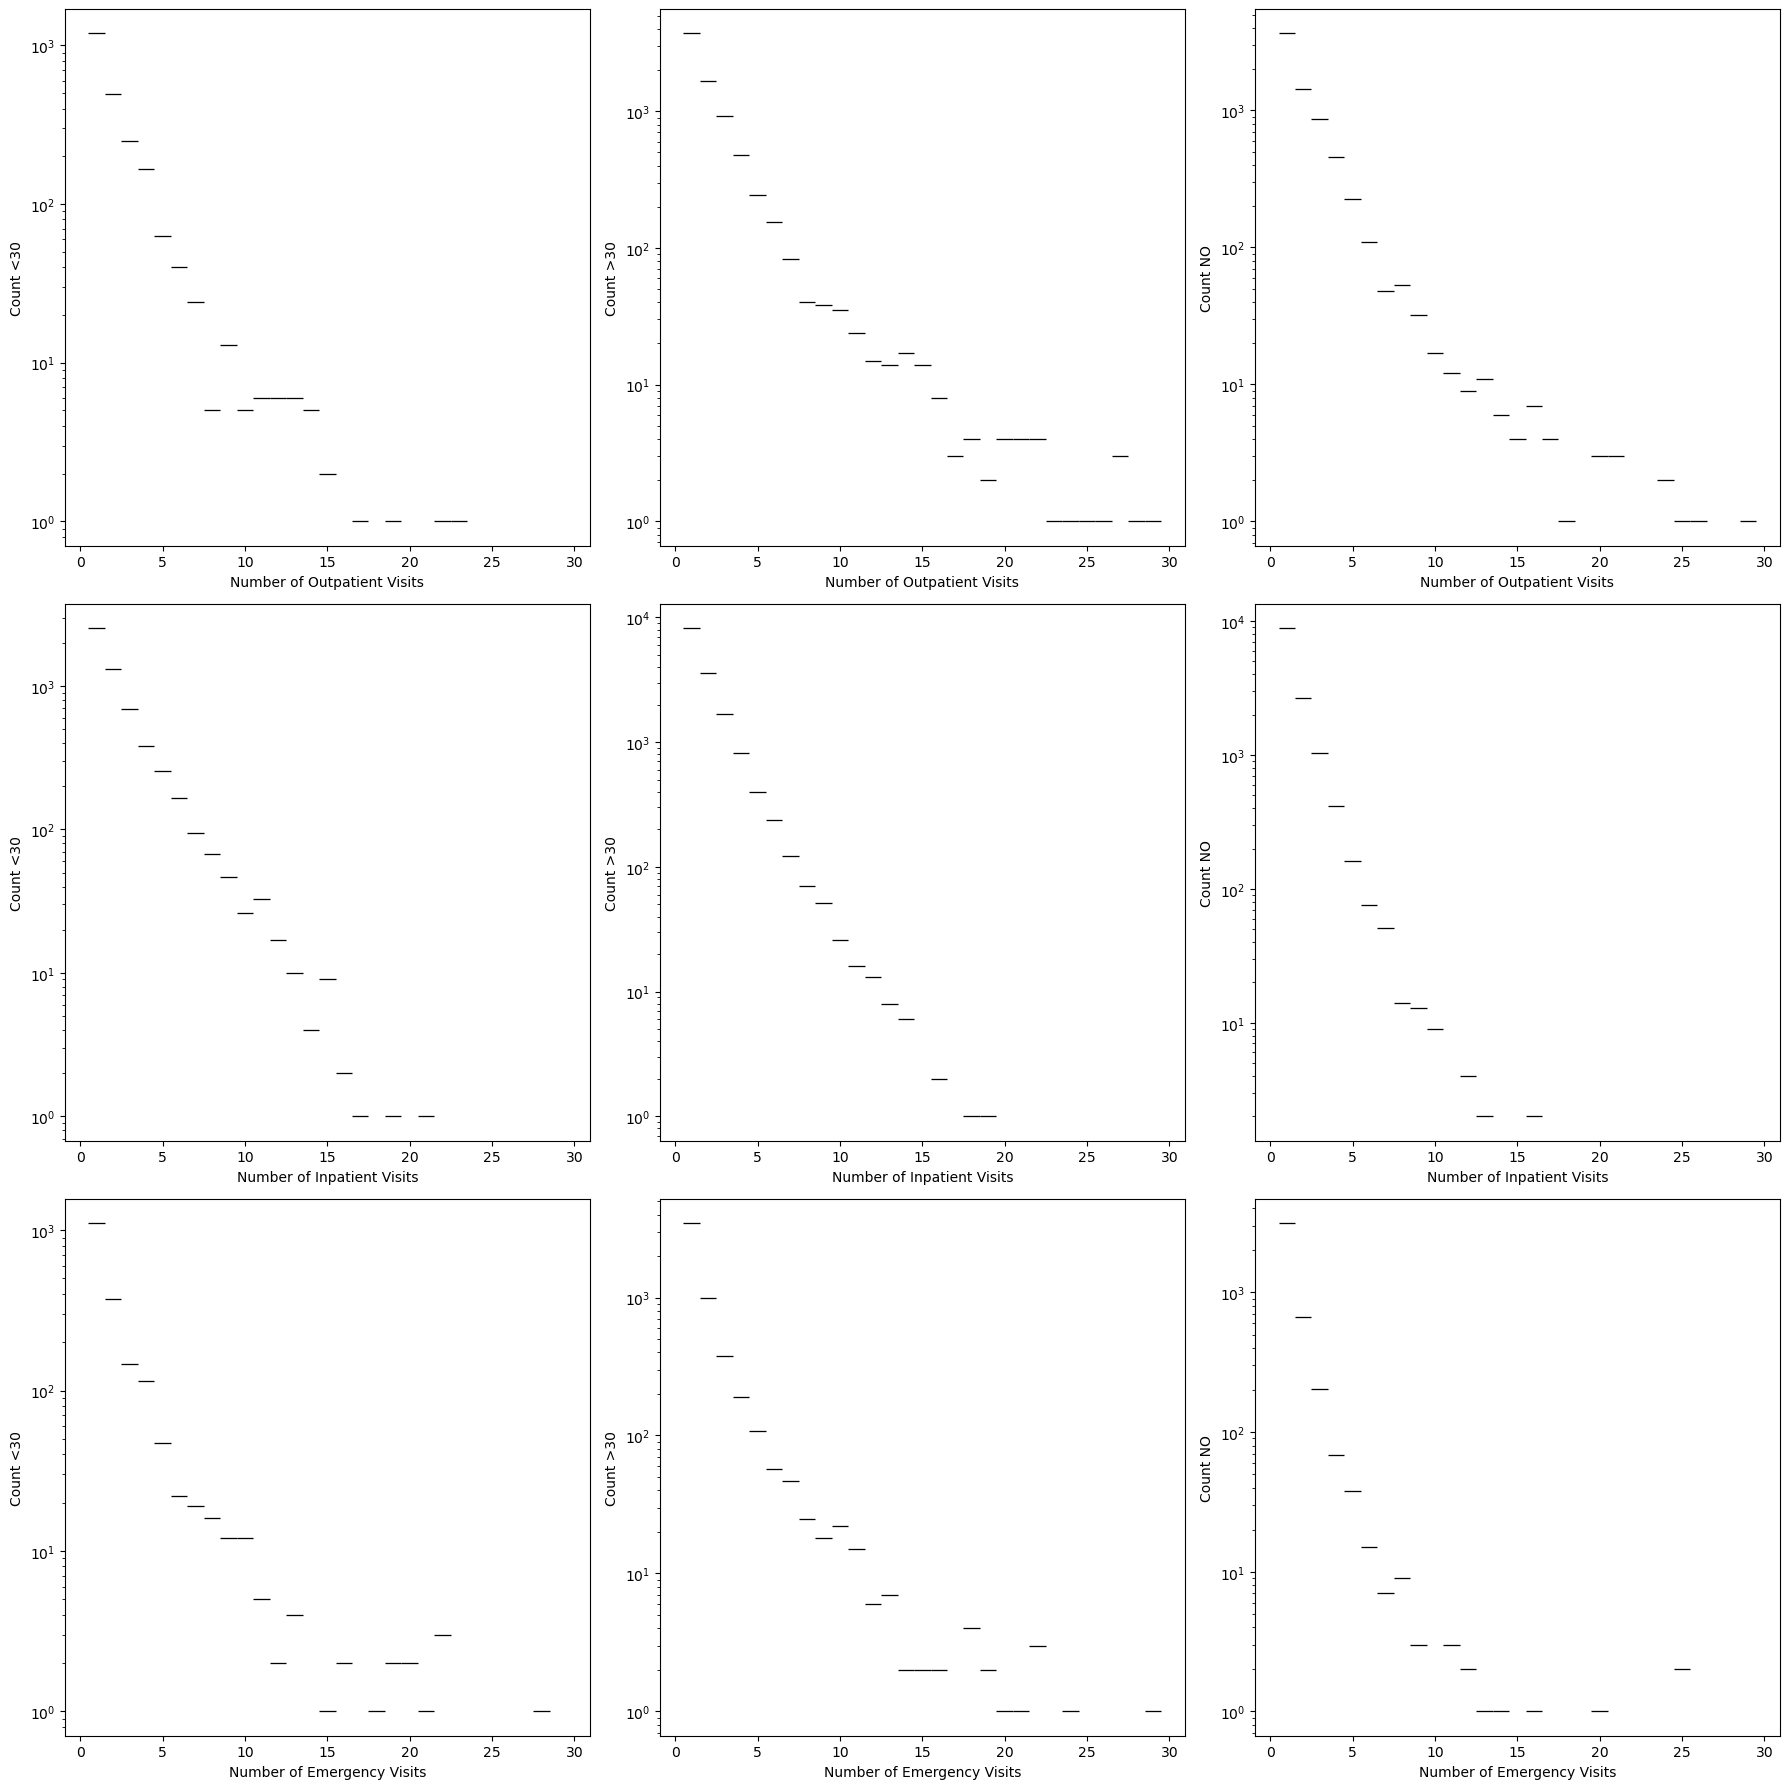

In [100]:
fig, axes = plt.subplots(3, 3, figsize=(18, 18))

readmission_types = ['<30', '>30', 'NO']

# First melt the data
melted_data = data.melt(
    id_vars=['readmitted'],
    value_vars=visit_types,
    var_name='visit_type',
    value_name='number_of_visits'
)

# Filter out zeros and top 5% in each visit type group
filtered_melted = melted_data

for i, visit_type in enumerate(visit_types):
    for j, readmission in enumerate(readmission_types):
        subset = filtered_melted[
            (filtered_melted['visit_type'] == visit_type) & 
            (filtered_melted['readmitted'] == readmission)
        ]
        # Set consistent bins from 1 to 30 with interval of 1
        bins = np.arange(0.5, 30.5, 1)
        sns.histplot(
            data=subset,
            x='number_of_visits',
            ax=axes[i,j],
            bins=bins,
            log_scale=(False, True)
        )
        
        axes[i,j].set_xlabel(f'Number of {titles[i]}', fontsize=10)
        axes[i,j].set_ylabel(f'Count {readmission_types[j]}', fontsize=10)

plt.tight_layout()

##### Observation

Number of past inpatient visits does not seem to be strongly correlated with number of past outpatient visits. Looking at extreme values, it is more likely to have patient high in past inpatient visits and moderate in past outpatient visits or vice versa that having patient that is concurrently high in both (downward sloping scatter plot). Considered together, more past visits does increase readmission risk. The effect is strongest for inpatient visits. Whether the visit was emergency may not be an important factor as the data for emergency visits are rather sparse so not sufficient to draw any conclusion.

### Number of Medications Prescribed

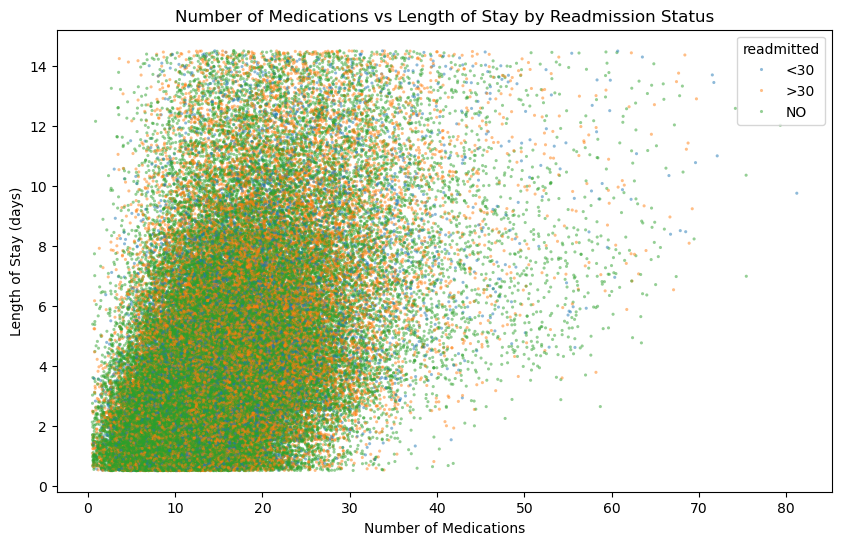

In [110]:
plt.figure(figsize=(10, 6))
# Add random jitter to integer coordinates to reduce overlap
x_jitter = np.random.uniform(-0.5, 0.5, len(data))
y_jitter = np.random.uniform(-0.5, 0.5, len(data))
sns.scatterplot(data=data, 
                x=(data['num_medications'] + x_jitter),
                y=(data['time_in_hospital'] + y_jitter),
                hue='readmitted',
                alpha=0.5,
                linewidth=0,
                s=5)
plt.title('Number of Medications vs Length of Stay by Readmission Status')
plt.xlabel('Number of Medications')
plt.ylabel('Length of Stay (days)');

##### Observation

Length of Stay seems to be strongly correlated with the Number of Medications prescribed (upward sloping scatter plot). Though we are not able to tell which is driving which.

### Correlation Heatmap of Numeric Features

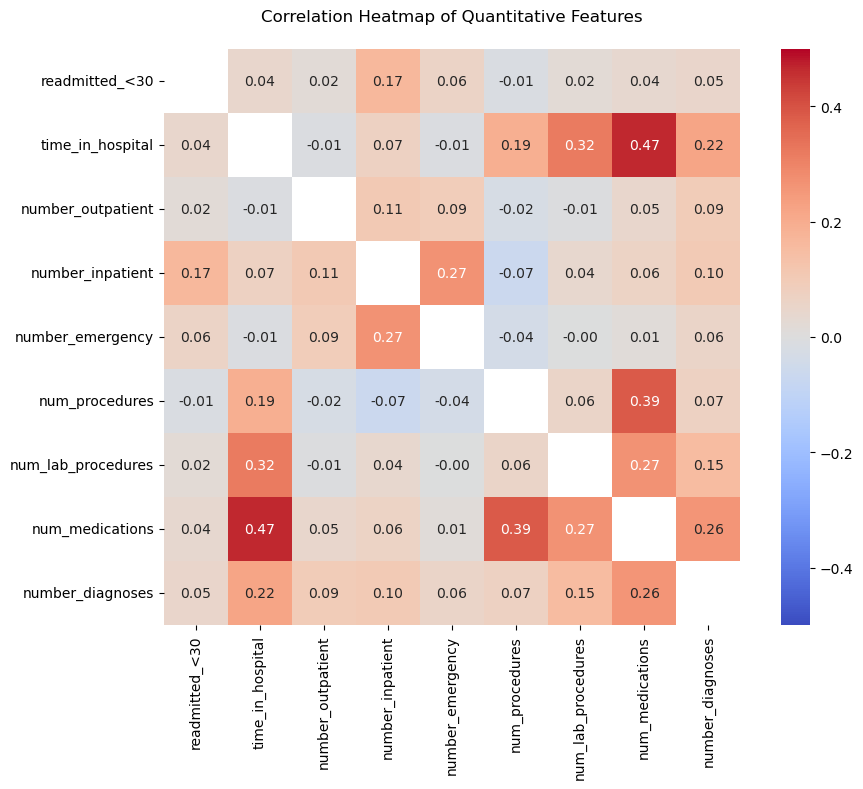

In [ ]:
# Create correlation matrix for numeric columns including procedures, labs, and medications
numeric_cols = ['time_in_hospital',
                'number_outpatient', 'number_inpatient', 'number_emergency', 
                'num_procedures', 'num_lab_procedures', 'num_medications', 'number_diagnoses']

# Calculate correlation matrix
corr_matrix = pd.concat([targets_oh["readmitted_<30"], data[numeric_cols]], axis=1).corr()
# Create mask for diagonal
mask = np.eye(len(corr_matrix))

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix,
            mask=mask,
            annot=True,
            cmap='coolwarm',
            vmin=-0.5, 
            vmax=0.5,
            center=0,
            square=True,
            fmt='.2f')

plt.title('Correlation Heatmap of Numeric Features', pad=20)
plt.tight_layout()
plt.show()


##### Observation

The correlation heatmap confirms our observation that number of medication is strongly (and positively) correlated with the length of stay. The best predictor for readmission risk is still number of past inpatient visits. Other notable strong correlations are between number of procedures administered and number of medication prescribed and number of lab and non-lab procedures performed.

## Medications

### Usage Pattern

In [38]:
# Get medication columns (rows 24-46 from variables table)
medication_cols = dataset.variables[dataset.variables["description"].str.startswith("The feature indicates whether the drug was prescribed")]["name"]

medications_bool = data[medication_cols].apply(lambda x: (x != 'No').astype(int))

In [39]:
med_usage = pd.DataFrame({
    "readmitted_<30": (medications_bool.mul(targets_oh["readmitted_<30"], axis=0)).sum(axis=0) / len(data) * 100,
    "readmitted_>30": (medications_bool.mul(targets_oh["readmitted_>30"], axis=0)).sum(axis=0) / len(data) * 100,
    "readmitted_NO": (medications_bool.mul(targets_oh["readmitted_NO"], axis=0)).sum(axis=0) / len(data) * 100
})

med_usage = med_usage.reindex(med_usage.sum(axis=1).sort_values(ascending=False).index)

<Figure size 1200x600 with 0 Axes>

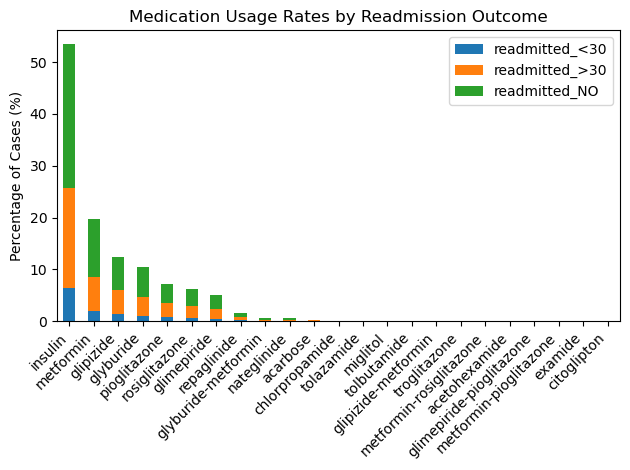

In [115]:
# Plot stacked bar chart
plt.figure(figsize=(12, 6))
med_usage.plot(kind='bar', stacked=True)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Percentage of Cases (%)')
plt.title('Medication Usage Rates by Readmission Outcome')
plt.tight_layout();

##### Observations

The most common medication prescribed is insulin (> 50% of the time) which isn't surprising for a study focused on diabetic patients. The usage chart has a long tail: most usage concentrated in the top 10 prescribed medications while the rest appearing < 1% of the time.

<Figure size 1000x800 with 0 Axes>

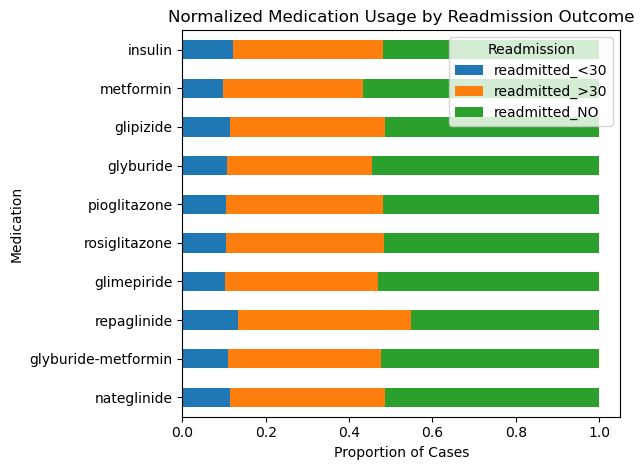

In [113]:
# Normalize medication usage to show relative proportions
med_usage_norm = med_usage.div(med_usage.sum(axis=1), axis=0)

# Take top 10 medications by total usage
med_norm_df = med_usage_norm.head(10)[::-1]

# Plot horizontal bar chart
plt.figure(figsize=(10, 8))
med_norm_df.plot(kind='barh', stacked=True)
plt.xlabel('Proportion of Cases')
plt.ylabel('Medication')
plt.title('Normalized Medication Usage by Readmission Outcome')
plt.legend(title='Readmission', loc='upper right')
plt.tight_layout();

### Correlation between Medications and between Medication and Outcome

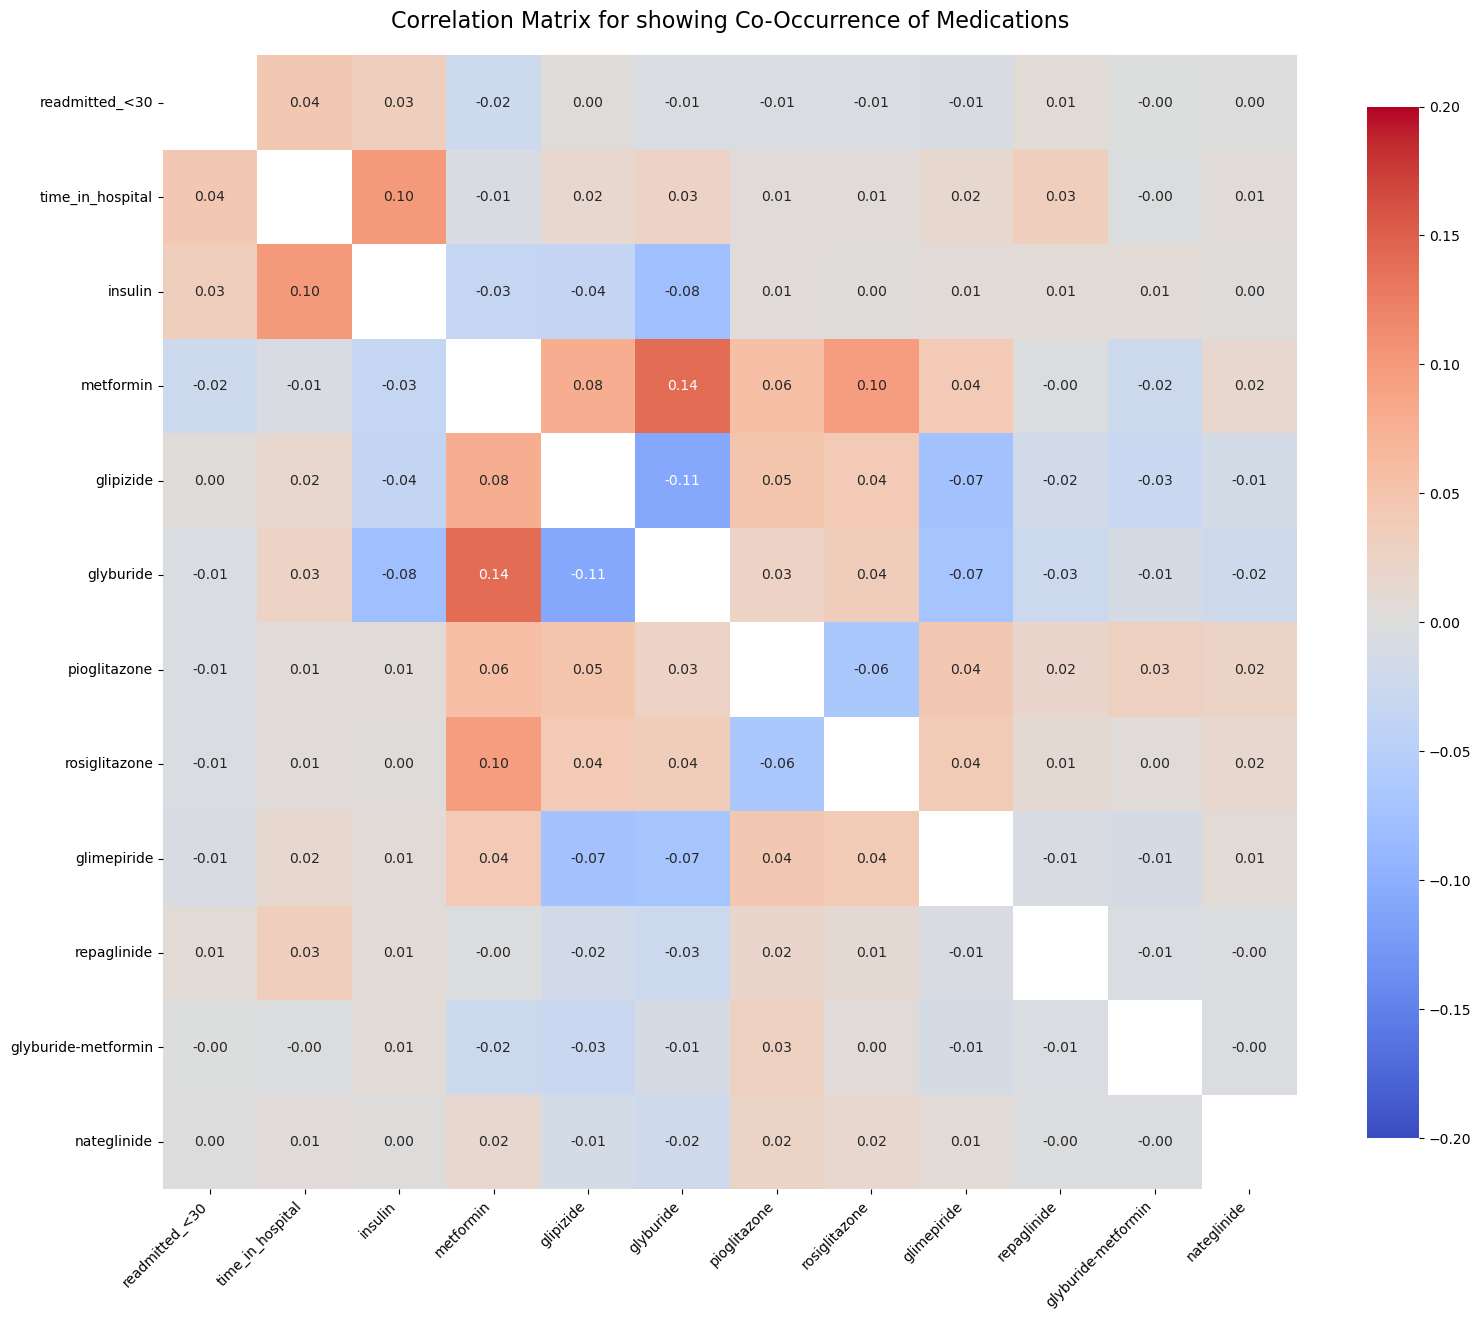

In [117]:
medication_corr_data = pd.concat([
    targets_oh["readmitted_<30"],
    data["time_in_hospital"],
    medications_bool[med_usage.index[:10]]
], axis=1)
corr_matrix = medication_corr_data.corr()

# Create heatmap
plt.figure(figsize=(16, 14))
mask = np.eye(len(corr_matrix))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', center=0, vmin=-0.2, vmax=0.2,
            square=True, fmt='.2f', cbar_kws={'shrink': 0.8})
plt.title('Correlation Matrix for showing Co-Occurrence of Medications', pad=20, fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout();

##### Observation

Correlation between medication prescribed and outcome is not straight forward positive or negative due to other factors that come into play. For example the positive correlation between insulin prescription and length of stay could be driven by some third factors like patient effect (eg. sicker patient more likely to be prescribed insulin and stays longer in hospital). 

Negative correlation between insulin prescription and other medications points indicates a substitution effect.

### Co-Occurance Study using PCA

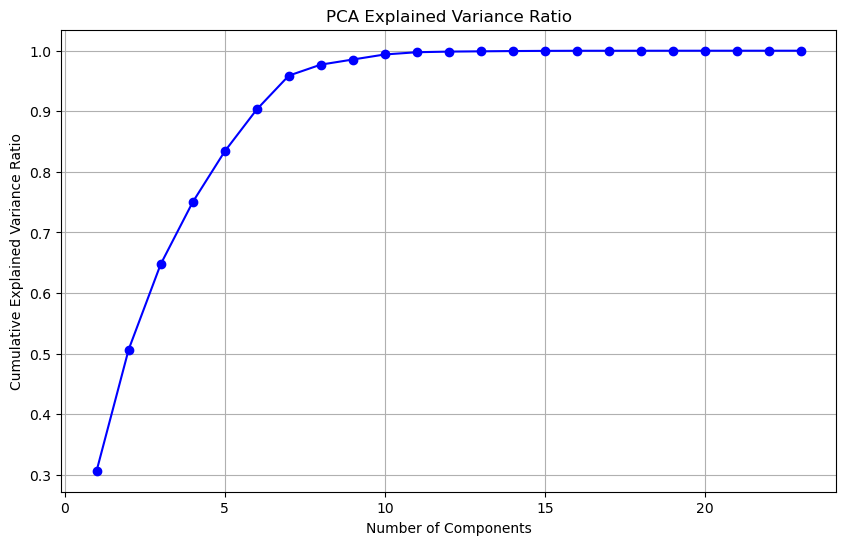

In [43]:
# Perform PCA on top 10 medications
from sklearn.decomposition import PCA

pca_medication_data = medications_bool[[med for med in med_usage.index]]

# Initialize and fit PCA
pca = PCA()
pca_result = pca.fit_transform(pca_medication_data)

# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         np.cumsum(pca.explained_variance_ratio_), 'bo-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('PCA Explained Variance Ratio')
plt.grid(True)
plt.show()


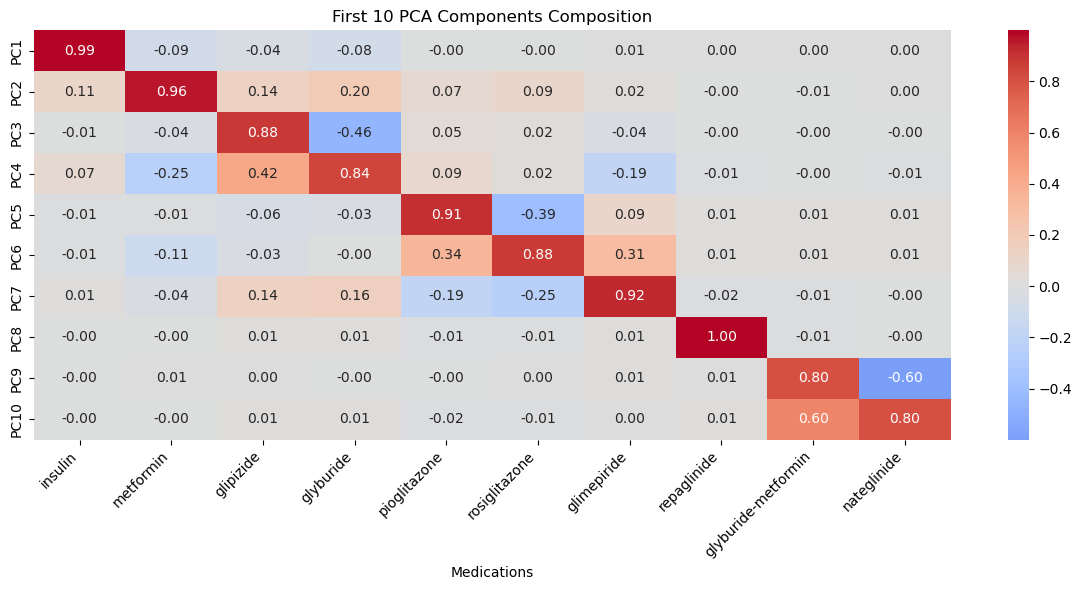

In [44]:
# Create a DataFrame with PCA components
pca_components = pd.DataFrame(
    pca.components_[:10,:10],  # Get first 10 components
    columns=med_usage.index[:10],
    index=[f'PC{i+1}' for i in range(10)]
)

# Plot heatmap of components
plt.figure(figsize=(12, 6))
sns.heatmap(pca_components, cmap='coolwarm', center=0, annot=True, fmt='.2f')
plt.title('First 10 PCA Components Composition')
plt.xlabel('Medications')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

##### Observation

The component composition chart shows some interesting patterns that confirms some of our earlier observations on the correlation heatmap. The first principal component (PC) is almost exclusively the effect of insulin showing insulin is indeed often used exclusively. PC2 mostly captures usage of metformin but also a little bit of glipizide and glyburide. PC3 and PC4 shows two clusters of usage patterns: 1. using glipizide but not glyburide and 2. using glipzide together with glyburide. The same clustering patterns can be seen in PC5, PC6 & PC7. 

The clustering of composition weights along the diagonal with medications sorted in terms of usage shows distinct usage clusters which suggests the medication features can be greatly reduced in dimensions. This is supported by the observation that just the first 7 principal components cover > 95% of data variance.

## Diagnosis

Dianogses columns have more 900 categories with a long tail distribution. For this information to be used in modelling, it makes sense to shrink the large degrees of freedom with some dimension reduction. To maximize the identification of clusters, we combine the 3 diagnogses columns (ignoring whether it is the primary, secondary, or additional diagnosis) into a single set of one hot encodings then further combine along the patient axis. PCA analysis is then performed on this combined one hot encoding set.

In [45]:
# Combine all unique diagnosis values from diag_1, diag_2, and diag_3
all_diag_categories = pd.concat([data["diag_1"], data["diag_2"], data["diag_3"]]).unique()
# Remove None/NaN values from categories
all_diag_categories = all_diag_categories[pd.notna(all_diag_categories)]
data["diag_1"] = pd.Categorical(data["diag_1"], categories=all_diag_categories)
data["diag_2"] = pd.Categorical(data["diag_2"], categories=all_diag_categories)
data["diag_3"] = pd.Categorical(data["diag_3"], categories=all_diag_categories)

In [46]:
diag_1_oh = pd.get_dummies(data["diag_1"], dtype=int)
diag_2_oh = pd.get_dummies(data["diag_2"], dtype=int)
diag_3_oh = pd.get_dummies(data["diag_3"], dtype=int)

# Combine diagnosis one-hot encodings with OR operation
diag_oh_combined = diag_1_oh | diag_2_oh | diag_3_oh

# Get the most frequent diagnosis
most_freq_diag = diag_oh_combined.sum().sort_values(ascending=False).index

In [47]:
# Create dataframe with patient numbers and diagnosis one-hot encodings
patient_diag_oh = pd.concat([data['patient_nbr'], diag_oh_combined], axis=1)

# Group by patient and combine using max (equivalent to OR for binary values)
patient_grouped_diag_oh = patient_diag_oh.groupby('patient_nbr').max()

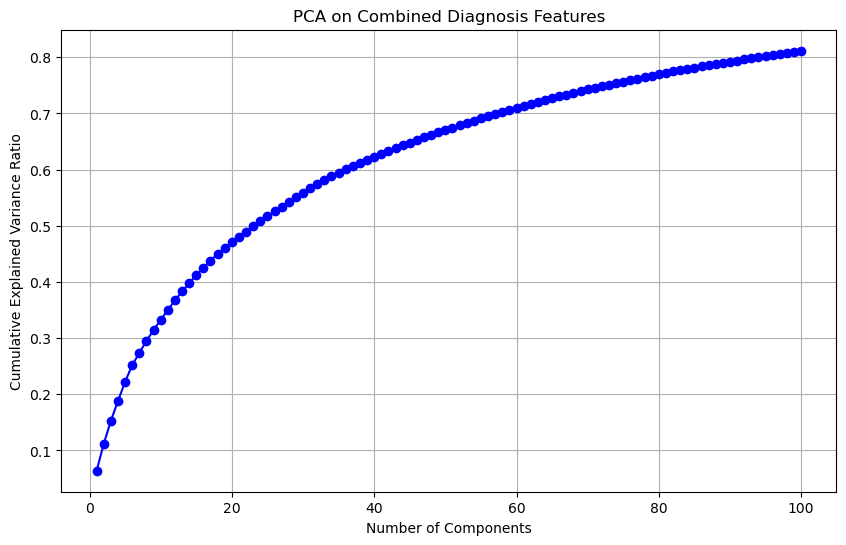

In [48]:
# Perform PCA on combined diagnosis one-hot encodings
pca = PCA()
diag_pca = pca.fit_transform(patient_grouped_diag_oh[most_freq_diag])

# Calculate explained variance ratio
explained_var_ratio = pca.explained_variance_ratio_

# Plot cumulative explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, 100 + 1), np.cumsum(explained_var_ratio[:100]), 'bo-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('PCA on Combined Diagnosis Features')
plt.grid(True)
plt.show();

In [49]:
# Load ICD9 codes and create mapping series
icd9_labels = pd.read_csv('../data/ICD9.csv', index_col='code')['diag']

Source: 
- https://aspe.hhs.gov/sites/default/files/migrated_legacy_files//169931/icd-9-comparison-excel-file.csv
- https://docs.google.com/spreadsheets/d/1zq-_6fxeev0-6wo10qvnBHOsNm99a9Fe-EzJLLE4iCo/edit?usp=sharing

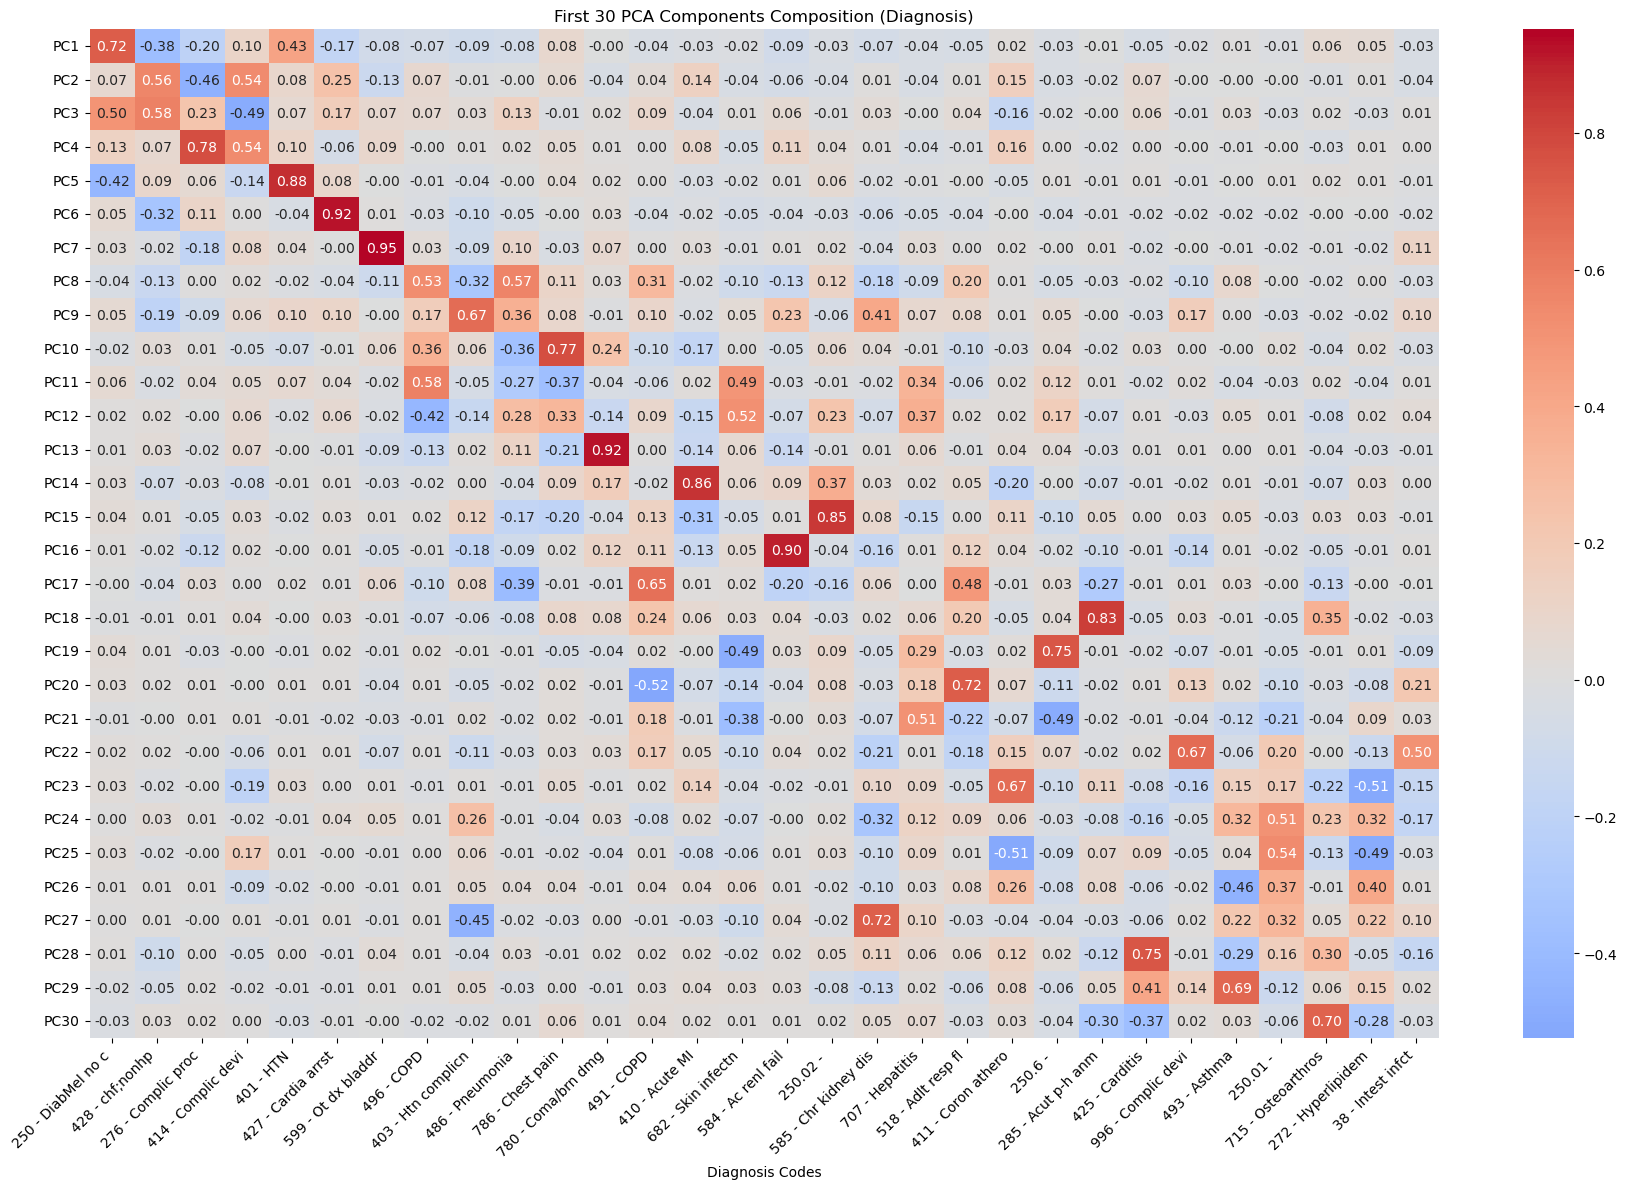

In [50]:
# Create DataFrame of first 30 PCA components
diag_pca_components = pd.DataFrame(
    pca.components_[:30,:30],  # Get first 30 components
    columns=most_freq_diag[:30],
    index=[f'PC{i+1}' for i in range(30)]
)
# Map diagnosis codes to labels, padding with zeros
diag_pca_components.columns = [f'{code} - {icd9_labels.get(code.zfill(3), "")}' for code in diag_pca_components.columns]

# Plot heatmap of components
plt.figure(figsize=(18, 12))
sns.heatmap(diag_pca_components, cmap='coolwarm', center=0, annot=True, fmt='.2f')
plt.title('First 30 PCA Components Composition (Diagnosis)')
plt.xlabel('Diagnosis Codes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### Observation

The variation captured by individual principal components are much more spread out compared to medication features. The first 100 PC account for only ~80% of the variation. Though the clustering of composition weights along the diagonal shows significant dianogses clustering. Some of the clusters like PC2-4 and PC8-10 cuts across different ICD9 categories (first char of ICD9 code) which shows that following the hierachy and classification established by ICD9 may not be the best approach to capture data variation.

## Lab Result

In [51]:
data["max_glu_serum"] = data["max_glu_serum"].astype('category')
data["A1Cresult"] = data["A1Cresult"].astype('category')

In [52]:
print(data["max_glu_serum"].cat.categories)
data["max_glu_serum"] = data["max_glu_serum"].cat.reorder_categories(['Norm', '>200', '>300'])

Index(['>200', '>300', 'Norm'], dtype='object')


/var/folders/f4/31_68v2j2cv6d4n29813zycw0000gn/T/ipykernel_38247/2048430354.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ) if patient_weighted else data.groupby(name)['readmitted'].value_counts().unstack(fill_value=0)


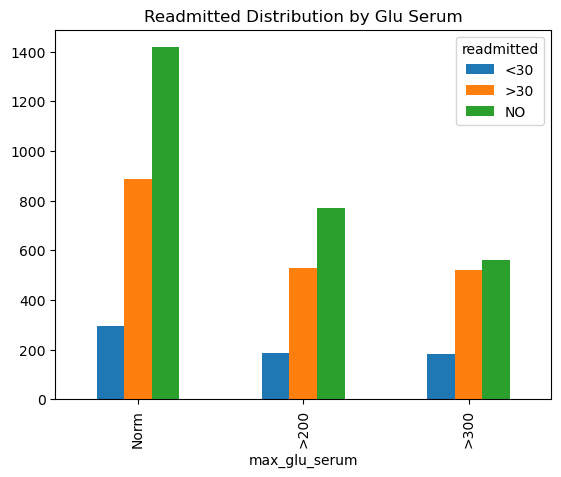

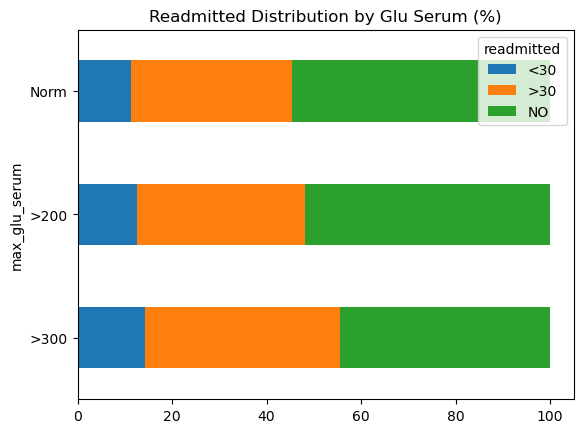

In [53]:
outcome_by_glu_serum = get_outcome_by_feature("max_glu_serum")
outcome_by_glu_serum.plot(kind="bar", title="Readmitted Distribution by Glu Serum")
outcome_by_glu_serum_pct = outcome_by_glu_serum.div(outcome_by_glu_serum.sum(axis=1), axis=0) * 100
outcome_by_glu_serum_pct.iloc[::-1].plot(kind="barh", stacked=True, title="Readmitted Distribution by Glu Serum (%)");

In [54]:
print(data["A1Cresult"].cat.categories)
data["A1Cresult"] = data["A1Cresult"].cat.reorder_categories(['Norm', '>7', '>8'])

Index(['>7', '>8', 'Norm'], dtype='object')


/var/folders/f4/31_68v2j2cv6d4n29813zycw0000gn/T/ipykernel_38247/2048430354.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ) if patient_weighted else data.groupby(name)['readmitted'].value_counts().unstack(fill_value=0)


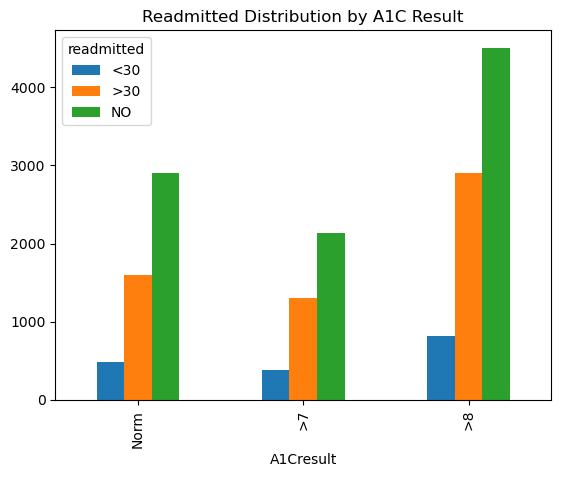

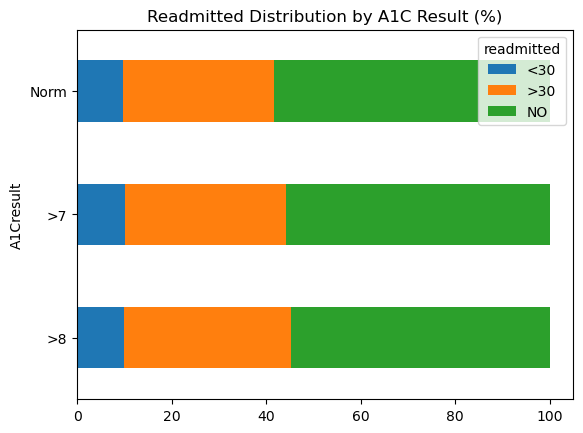

In [55]:
outcome_by_A1Cresult = get_outcome_by_feature("A1Cresult")
outcome_by_A1Cresult.plot(kind="bar", title="Readmitted Distribution by A1C Result")
outcome_by_A1Cresult_pct = outcome_by_A1Cresult.div(outcome_by_A1Cresult.sum(axis=1), axis=0) * 100
outcome_by_A1Cresult_pct.iloc[::-1].plot(kind="barh", stacked=True, title="Readmitted Distribution by A1C Result (%)");

In [56]:
def perform_chi_square_test(feature):
    """
    Perform chi-square test of independence between feature and readmission status
    """
    # Create contingency table
    contingency_table = pd.crosstab(
        data[feature], 
        data['readmitted']
    )
    
    # Perform chi-square test
    chi2, p_value, dof, _ = chi2_contingency(contingency_table)
    
    print(f"Chi-square test for {feature} vs readmission status:")
    print(f"Chi-square statistic: {chi2:.4f}")
    print(f"p-value: {p_value:.4f}")
    print(f"Degrees of freedom: {dof}")
    print("Contingency table:")
    print(contingency_table.round().astype(int))
    print()
    
    return chi2, p_value, contingency_table

# Perform chi-square tests for lab results
for feature in ["max_glu_serum", "A1Cresult"]:
    perform_chi_square_test(feature)

Chi-square test for max_glu_serum vs readmission status:
Chi-square statistic: 35.1101
p-value: 0.0000
Degrees of freedom: 4
Contingency table:
readmitted     <30  >30    NO
max_glu_serum                
Norm           295  885  1417
>200           185  530   770
>300           181  521   562

Chi-square test for A1Cresult vs readmission status:
Chi-square statistic: 16.7850
p-value: 0.0021
Degrees of freedom: 4
Contingency table:
readmitted  <30   >30    NO
A1Cresult                  
Norm        482  1599  2909
>7          383  1300  2129
>8          811  2901  4504



## Mixed Model Analysis

Mixed Model Analysis allows us to study how much unaccounted patient level differences influence outcomes thus guiding modelling approach.

In [57]:
# Fit mixed model to calculate ICC for length of stay predicted by past inpatient visits
import statsmodels.api as sm
from statsmodels.regression.mixed_linear_model import MixedLM

test_predictors = ['number_inpatient', 'num_procedures', 'num_lab_procedures',
                   'num_medications', 'number_diagnoses', 'race', 'gender', 'age']

In [58]:
def compute_icc(data, outcome, predictor):
    exog = np.ones(len(data))
    if predictor is not  None:
        if isinstance(data[predictor].dtype, pd.CategoricalDtype) or data[predictor].dtype == object:
            if data[predictor].isna().any():
                if isinstance(data[predictor].dtype, pd.CategoricalDtype):
                    if 'Unknown' not in data[predictor].cat.categories:
                        data[predictor] = data[predictor].cat.add_categories('Unknown')
                    clean_data = data[predictor].fillna('Unknown')
                else:
                    clean_data = data[predictor].fillna('Unknown')
            else:
                clean_data = data[predictor]
            exog = pd.get_dummies(clean_data, drop_first=False, dtype=int)
        else:
            exog = sm.add_constant(data[predictor])

    model = MixedLM(
        endog=data[outcome],
        exog=exog,
        groups=data['patient_nbr'],
        exog_re=np.ones((len(exog), 1))
    )

    result = model.fit()
    random_effects = result.cov_re.iloc[0,0]  # Intercept variance
    residual = result.scale
    return random_effects / (random_effects + residual)

In [59]:
def compute_full_model_icc(data, outcome, predictors):
    exog_components = []
    
    for predictor in predictors:
        if isinstance(data[predictor].dtype, pd.CategoricalDtype) or data[predictor].dtype == object:
            # Handle categorical variables
            if data[predictor].isna().any():
                if isinstance(data[predictor].dtype, pd.CategoricalDtype):
                    if 'Unknown' not in data[predictor].cat.categories:
                        data[predictor] = data[predictor].cat.add_categories('Unknown')
                    clean_data = data[predictor].fillna('Unknown')
                else:
                    clean_data = data[predictor].fillna('Unknown')
            else:
                clean_data = data[predictor]
            
            # Create dummy variables
            dummies = pd.get_dummies(clean_data, drop_first=True, dtype=int)
            exog_components.append(dummies)
            
        else:
            # Handle continuous variables
            continuous_data = data[predictor].fillna(data[predictor].mean())  # Fill with mean
            exog_components.append(continuous_data)
    
    # Concatenate all components
    if exog_components:
        exog = pd.concat(exog_components, axis=1)
    else:
        # If no predictors, use just intercept
        exog = pd.DataFrame({'const': np.ones(len(data))}, index=data.index)
    
    # Add constant for the intercept (if not already present from continuous variables)
    exog = sm.add_constant(exog)
    
    model = MixedLM(
        endog=data[outcome],
        exog=exog,
        groups=data['patient_nbr'],
        exog_re=np.ones((len(exog), 1))
    )
    
    result = model.fit()
    
    random_effects = result.cov_re.iloc[0,0]  # Intercept variance
    residual = result.scale
    
    return random_effects / (random_effects + residual)

In [60]:
import pickle

# Initialize results dictionary
icc_results = {}

icc_results['NULL'] = compute_icc(data, 'time_in_hospital', None)

for predictor in test_predictors:
    icc_results[predictor] = compute_icc(data, 'time_in_hospital', predictor)

icc_results['FULL'] = compute_full_model_icc(data, 'time_in_hospital', test_predictors)

# Save ICC results to pickle file
with open('../src/assets/icc_results_los.pkl', 'wb') as f:
    pickle.dump(icc_results, f)

# Print results table
print("\nIntraclass Correlation Coefficients (ICC)")
print("=" * 50)
print("Model                  ICC")
print("-" * 50)
for model, icc in icc_results.items():
    print(f"{model:<20} {icc:.3f}")
print("\nThe ICC indicates what proportion of the variance in length of stay")
print("can be attributed to patient-level clustering")


Intraclass Correlation Coefficients (ICC)
Model                  ICC
--------------------------------------------------
NULL                 0.190
number_inpatient     0.183
num_procedures       0.219
num_lab_procedures   0.192
num_medications      0.250
number_diagnoses     0.194
race                 0.189
gender               0.189
age                  0.187
FULL                 0.230

The ICC indicates what proportion of the variance in length of stay
can be attributed to patient-level clustering


In [61]:
# Initialize results dictionary
icc_results = {}

data_with_oh = pd.concat([targets_oh, data], axis=1)

icc_results['NULL'] = compute_icc(data_with_oh, 'readmitted_<30', None)

for predictor in test_predictors:
    icc_results[predictor] = compute_icc(data_with_oh, 'readmitted_<30', predictor)

icc_results['FULL'] = compute_full_model_icc(data_with_oh, 'readmitted_<30', test_predictors)

# Save ICC results to pickle file
with open('../src/assets/icc_results_readmitted.pkl', 'wb') as f:
    pickle.dump(icc_results, f)

# Print results table
print("\nIntraclass Correlation Coefficients (ICC)")
print("=" * 50)
print("Model                  ICC")
print("-" * 50)
for model, icc in icc_results.items():
    print(f"{model:<20} {icc:.3f}")
print("\nThe ICC indicates what proportion of the variance in readmitted < 30")
print("can be attributed to patient-level clustering")

/opt/miniconda3/envs/it5006-group10/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/opt/miniconda3/envs/it5006-group10/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/opt/miniconda3/envs/it5006-group10/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/opt/miniconda3/envs/it5006-group10/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/opt/miniconda3/envs/it5006-group10/lib/python3.11/site-packages/statsmo


Intraclass Correlation Coefficients (ICC)
Model                  ICC
--------------------------------------------------
NULL                 0.070
number_inpatient     0.015
num_procedures       0.070
num_lab_procedures   0.070
num_medications      0.070
number_diagnoses     0.069
race                 0.070
gender               0.070
age                  0.070
FULL                 0.016

The ICC indicates what proportion of the variance in readmitted < 30
can be attributed to patient-level clustering


##### Observation

For predicting length of stay, the null model's intraclass correlation coefficient is rather high at 0.19. This value did not go down significantly when we add in fixed effects to the model. In fact ICC go up when we add in number of procedure or number of medication as fixed effect. This shows factors like number of medication only help explain within group variation but have smaller or no effect on between group variation. So patient level difference persists so not accounting for this in modelling will lead to inflation of the fixed effects of the model features.

The story is different for prediction of readmission risk. The null model's ICC is relatively low at 0.07. After including number of past inpatient visit as fixed effect, ICC shrinks to 0.016. Thus we are able to account for most of the between group variation and patient level difference can be ignored without much impact to model generalizability, robustness and interpretability.